# Setup

In [2]:
!pip3 install pandas
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import savefig

import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Normalizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


In [3]:
# %ls
yt_df = pd.read_csv('Global YouTube Statistics.csv', encoding='unicode_escape')

# Feature Engineering

## Getting to know the columns

In [135]:
yt_df.dtypes

rank                                         int64
Youtuber                                    object
subscribers                                  int64
video views                                float64
category                                    object
Title                                       object
uploads                                      int64
Country                                     object
Abbreviation                                object
channel_type                                object
video_views_rank                           float64
country_rank                               float64
channel_type_rank                          float64
video_views_for_the_last_30_days           float64
lowest_monthly_earnings                    float64
highest_monthly_earnings                   float64
lowest_yearly_earnings                     float64
highest_yearly_earnings                    float64
subscribers_for_last_30_days               float64
created_year                   

In [137]:
yt_df[['subscribers',  'subscribers_for_last_30_days',
       'video views', 'video_views_for_the_last_30_days',
        'lowest_monthly_earnings', 'highest_monthly_earnings',
        'lowest_yearly_earnings', 'highest_yearly_earnings']].describe()

,subscribers,subscribers_for_last_30_days,video views,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings
count,9.950000e+02,9.950000e+02,9.950000e+02,9.950000e+02,995.000000,9.950000e+02,9.950000e+02,9.950000e+02
mean,2.298241e+07,3.311124e+05,1.103954e+10,1.741601e+08,36886.148281,5.898078e+05,4.422574e+05,7.081814e+06
std,1.752611e+07,5.556820e+05,1.411084e+10,4.075915e+08,71858.724092,1.148622e+06,8.612161e+05,1.379704e+07
min,1.230000e+07,1.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.450000e+07,1.000000e+05,4.288145e+09,2.151350e+07,2700.000000,4.350000e+04,3.265000e+04,5.217500e+05
50%,1.770000e+07,2.000000e+05,7.760820e+09,6.451700e+07,13300.000000,2.127000e+05,1.595000e+05,2.600000e+06
75%,2.460000e+07,4.000000e+05,1.355470e+10,1.684435e+08,37900.000000,6.068000e+05,4.551000e+05,7.300000e+06
max,2.450000e+08,8.000000e+06,2.280000e+11,6.589000e+09,850900.000000,1.360000e+07,1.020000e+07,1.634000e+08


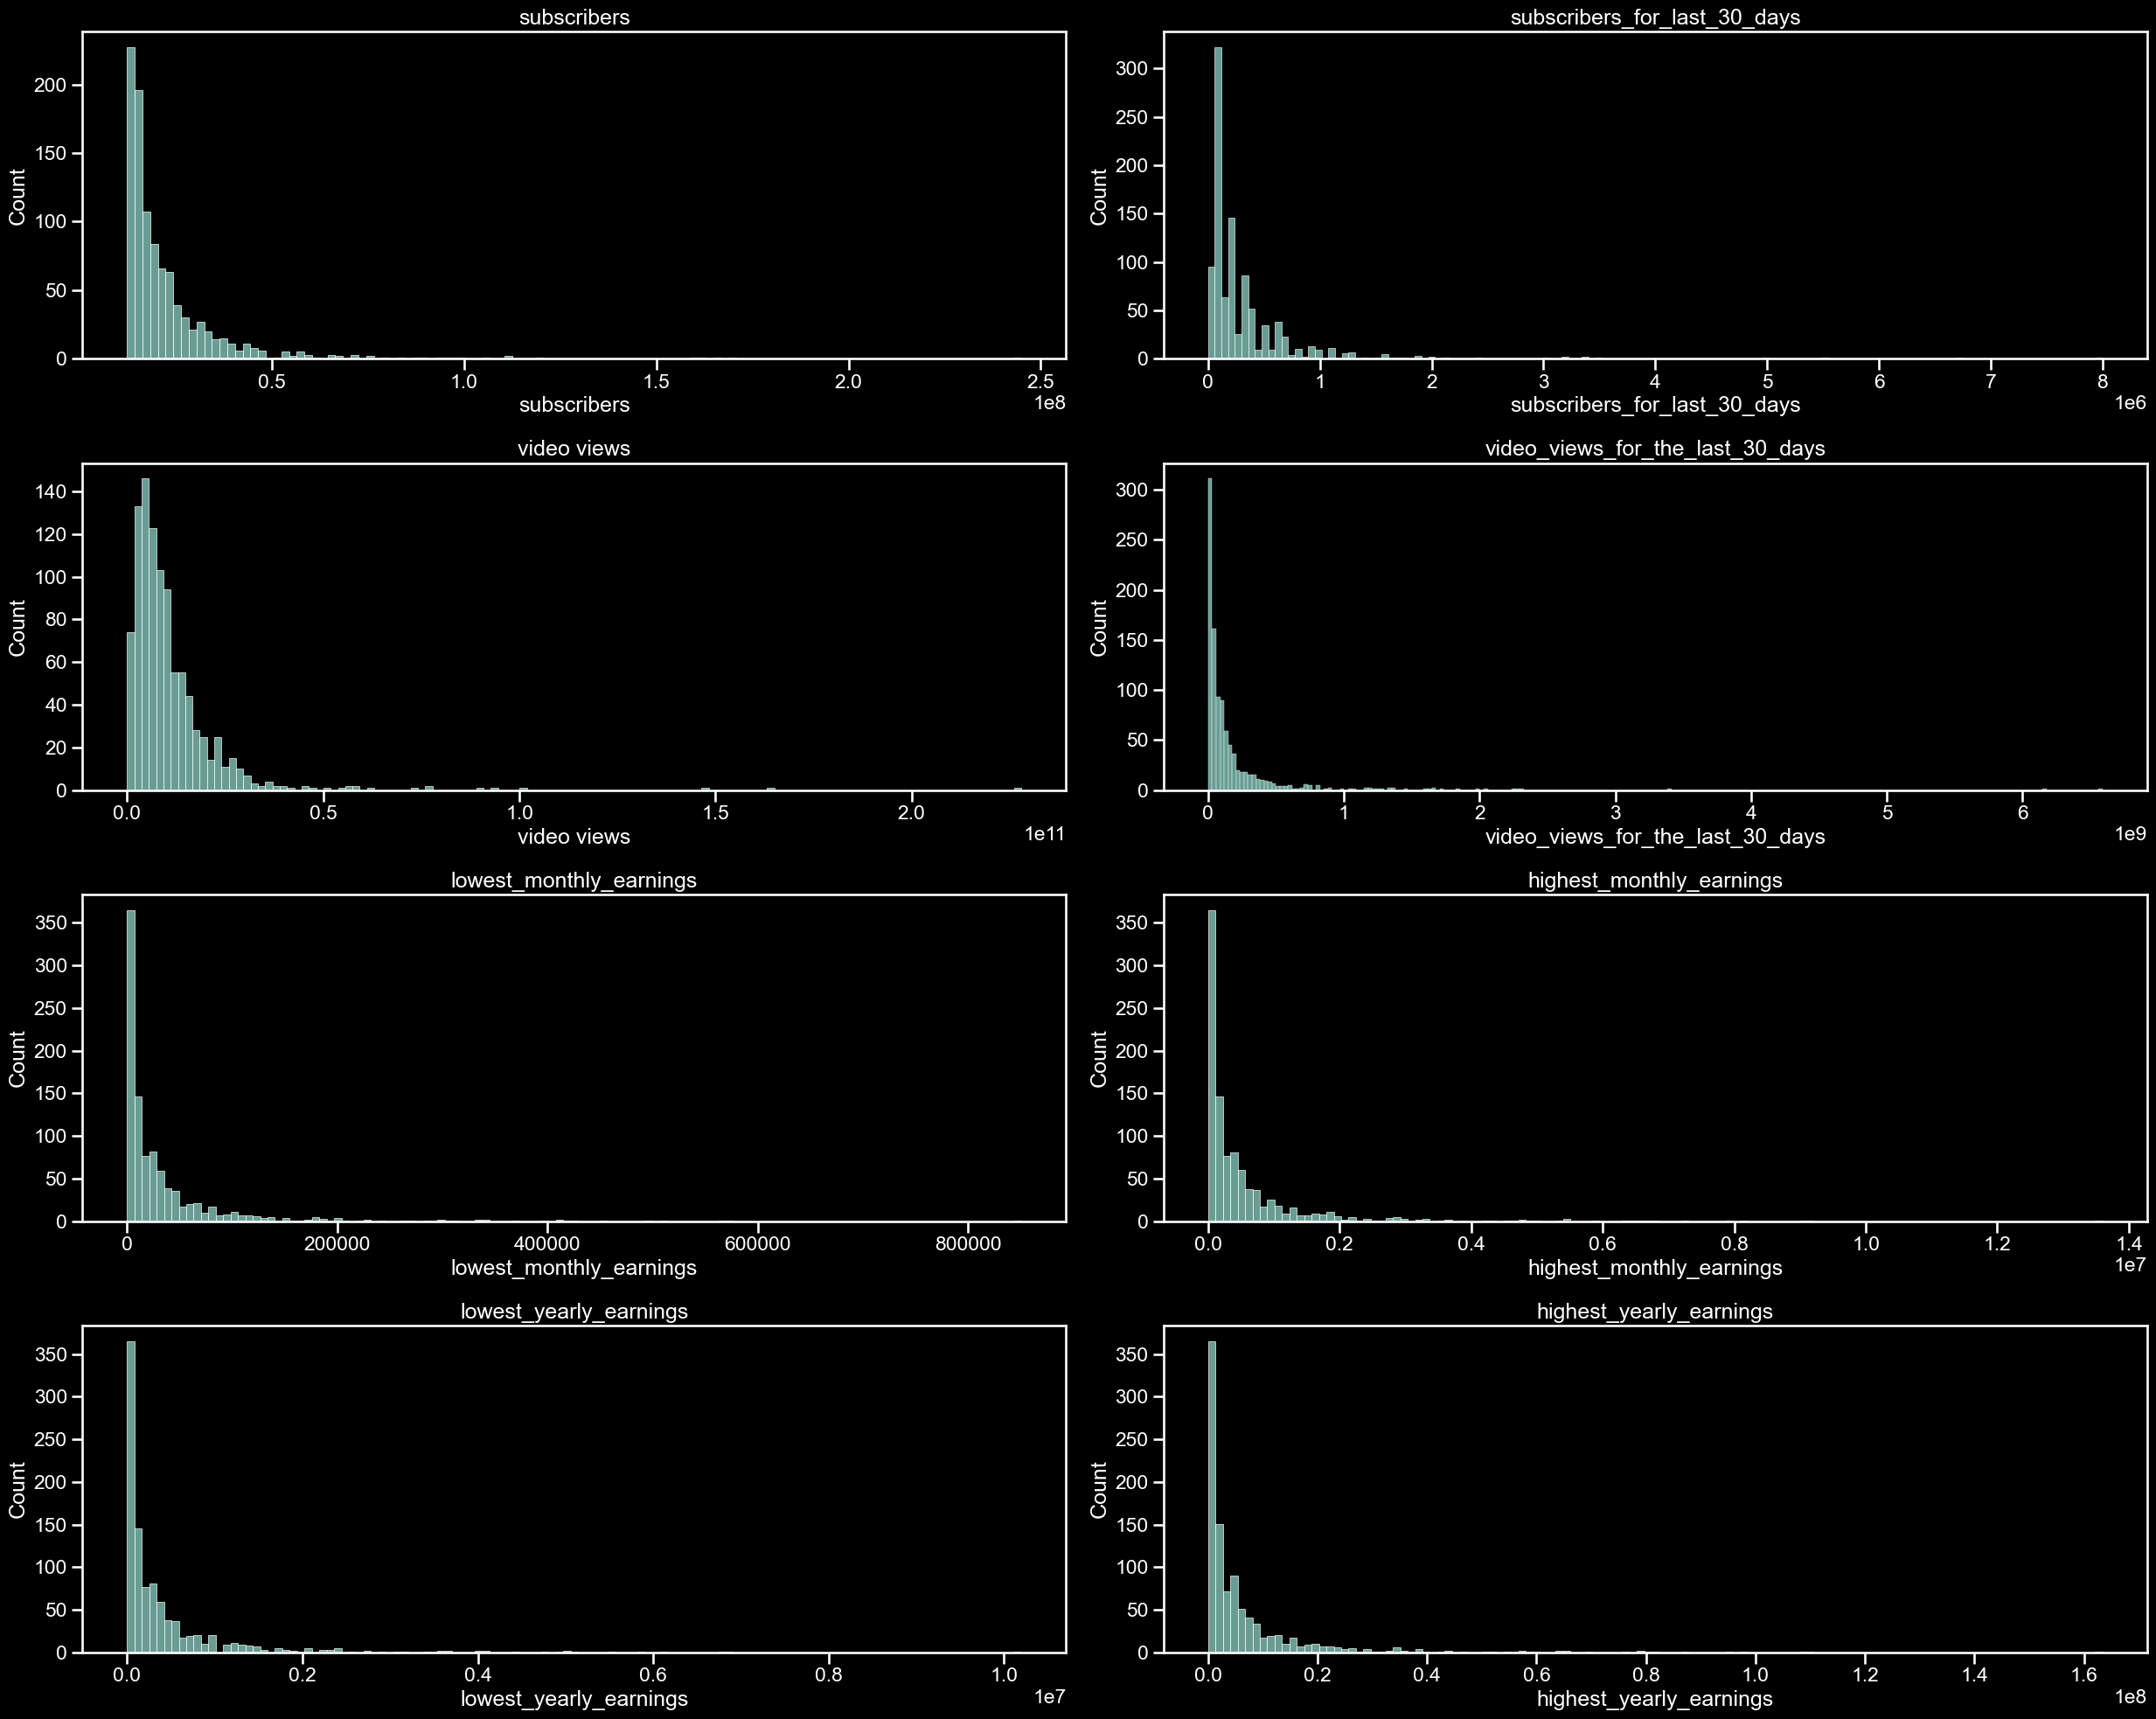

In [159]:
# fig, ax = plt.subplot(2,4, figsize=(10,40))
# sns.histplot(yt_df['subscribers'])

# plot
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig, axes = plt.subplots(4, 2, sharex=False, sharey=False, figsize=(25,20))
# fig.suptitle('30 Days Subscribers vs Subscribers')

# df_lst = [fill_in_nas, tmp]
# df_name = ['Fill NAs with 0s','Fill NAs with Linearly Interpolated Values']
# lst = ['subscribers',  'subscribers_for_last_30_days',
#        'video views', 'video_views_for_the_last_30_days',
#         'lowest_monthly_earnings', 'highest_monthly_earnings',
#         'lowest_yearly_earnings', 'highest_yearly_earnings']
dct = {
    'subscribers':[0,0],
    'subscribers_for_last_30_days':[0,1],
    'video views': [1,0],
    'video_views_for_the_last_30_days': [1,1],
    'lowest_monthly_earnings':[2,0],
    'highest_monthly_earnings': [2,1],
    'lowest_yearly_earnings': [3,0],
    'highest_yearly_earnings': [3,1],
}

for k,v in dct.items():
    sns.histplot(
        yt_df[k],
        ax=axes[v[0]][v[1]]
    )
    axes[v[0]][v[1]].set_title(k)

plt.tight_layout()

## NAs

check NAs

In [5]:
yt_df.columns[yt_df.isna().any()]

Index(['category', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

let's ignore these columns for now 
- categorical columns
- country-related (e.g. `Gross tertiary education enrollment (%)`, `Population`, `Unemployment rate`, `Urban_population`, `Latitude`, `Longitude`)

and focus on the numerical cols:
- `video_views_for_the_last_30_days`, `subscribers_for_last_30_days`

first create a df where NAs in `subscribers_for_last_30_days` and `video_views_for_the_last_30_days` are filled with 0's, since we can't plot NAs

In [72]:
fill_in_nas = yt_df.copy()[['Youtuber', 'subscribers', 'video views', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
fill_in_nas[['subscribers_for_last_30_days', 'video_views_for_the_last_30_days']] = fill_in_nas[['subscribers_for_last_30_days', 'video_views_for_the_last_30_days']].fillna(0)
fill_in_nas

,Youtuber,subscribers,video views,subscribers_for_last_30_days,video_views_for_the_last_30_days
0,T-Series,245000000,2.280000e+11,2000000.0,2.258000e+09
1,YouTube Movies,170000000,0.000000e+00,0.0,1.200000e+01
2,MrBeast,166000000,2.836884e+10,8000000.0,1.348000e+09
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,1000000.0,1.975000e+09
4,SET India,159000000,1.480000e+11,1000000.0,1.824000e+09
...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,700000.0,5.525130e+08
991,Free Fire India Official,12300000,1.674410e+09,300000.0,6.473500e+07
992,Panda,12300000,2.214684e+09,1000.0,6.703500e+04
993,RobTopGames,12300000,3.741235e+08,100000.0,3.871000e+06


we also interpolate the NAs using linear regression - as a comparison.

In [89]:

tmp = yt_df.copy()[['Youtuber', 'subscribers', 'video views', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
tmp[['subscribers_for_last_30_days','video_views_for_the_last_30_days']] =tmp[['subscribers_for_last_30_days','video_views_for_the_last_30_days']].interpolate('linear')
tmp

,Youtuber,subscribers,video views,subscribers_for_last_30_days,video_views_for_the_last_30_days
0,T-Series,245000000,2.280000e+11,2000000.0,2.258000e+09
1,YouTube Movies,170000000,0.000000e+00,5000000.0,1.200000e+01
2,MrBeast,166000000,2.836884e+10,8000000.0,1.348000e+09
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,1000000.0,1.975000e+09
4,SET India,159000000,1.480000e+11,1000000.0,1.824000e+09
...,...,...,...,...,...
990,Natan por Aï¿,12300000,9.029610e+09,700000.0,5.525130e+08
991,Free Fire India Official,12300000,1.674410e+09,300000.0,6.473500e+07
992,Panda,12300000,2.214684e+09,1000.0,6.703500e+04
993,RobTopGames,12300000,3.741235e+08,100000.0,3.871000e+06


then we put everything together and check how `subscribers_for_last_30_days` are 

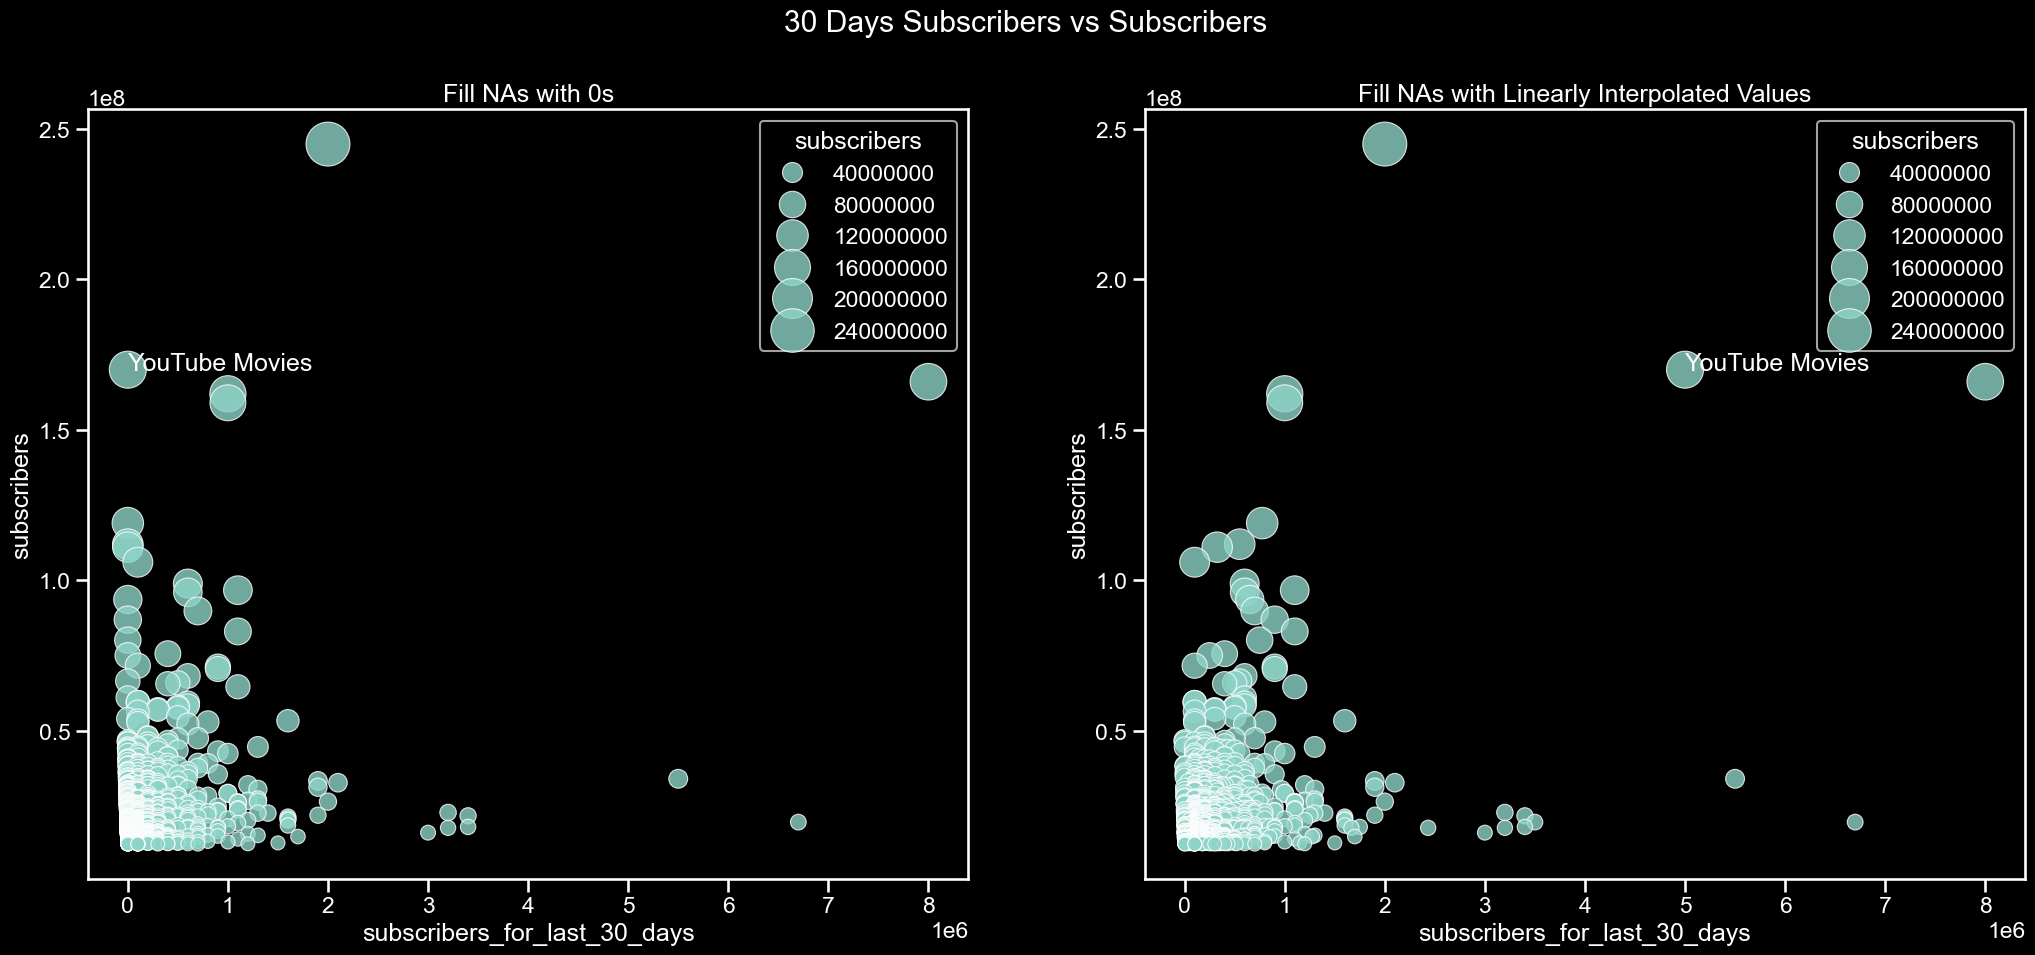

In [88]:
# fill with nas 
fill_in_nas = yt_df.copy()[['Youtuber', 'subscribers', 'video views', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
fill_in_nas[['subscribers_for_last_30_days', 'video_views_for_the_last_30_days']] = fill_in_nas[['subscribers_for_last_30_days', 'video_views_for_the_last_30_days']].fillna(0)

# create a subset for the a filtered df where subscribers_for_last_30_days is null
sub_30_nas = yt_df.copy()[['Youtuber','subscribers','subscribers_for_last_30_days']]
sub_30_nas = sub_30_nas[sub_30_nas['subscribers_for_last_30_days'].isna()]

# interpolate
tmp = yt_df.copy()[['Youtuber', 'subscribers', 'video views', 'subscribers_for_last_30_days', 'video_views_for_the_last_30_days']]
tmp[['subscribers_for_last_30_days','video_views_for_the_last_30_days']] =tmp[['subscribers_for_last_30_days','video_views_for_the_last_30_days']].interpolate('linear')


# plot
sns.set(style="ticks", context="talk")
plt.style.use("dark_background")
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))
fig.suptitle('30 Days Subscribers vs Subscribers')

df_lst = [fill_in_nas, tmp]
df_name = ['Fill NAs with 0s','Fill NAs with Linearly Interpolated Values']

for i in range(2):
    df = df_lst[i]
    sns.scatterplot(
        data=df,
        ax=axes[i],
        x='subscribers_for_last_30_days',
        y='subscribers',
        size='subscribers',
        sizes=(100,1000),
        alpha=.8
    )
    axes[i].set_title(f"{df_name[i]}")
    # g.set_title('30 Days Subscribers vs Subscribers', fontsize=15);

    for j in range(5):
        s = df.loc[j,'Youtuber']
        x = df.loc[j,'subscribers_for_last_30_days']
        y = df.loc[j,'subscribers']

        if s in sub_30_nas['Youtuber'].tolist():
            axes[i].annotate(
                text=s,
                xy=(x,y)
            )        


we use the interpolated results as new rows

In [90]:
yt_df[['subscribers_for_last_30_days','video_views_for_the_last_30_days']] =yt_df[['subscribers_for_last_30_days','video_views_for_the_last_30_days']].interpolate('linear')

In [91]:
# yt_df.to_csv('yt_df.csv')

## 0's

Note that a bunch of channels' earning columns are completely filled with 0's. These rows are not fit to be used in later sections.

In [133]:
yt_df.sort_values(by=['highest_monthly_earnings'])\
    [['Youtuber', 'video_views_for_the_last_30_days',  'lowest_yearly_earnings', 'highest_yearly_earnings', 'lowest_monthly_earnings', 'highest_monthly_earnings']][:10]

,Youtuber,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,lowest_monthly_earnings,highest_monthly_earnings
348,Khan GS Research Centre,351668500.0,0.0,0.0,0.0,0.0
468,Good Mythical Morning,304054500.0,0.0,0.0,0.0,0.0
358,Brave Wilderness,2989000.0,0.0,0.0,0.0,0.0
411,Official Pink Panther,41789500.0,0.0,0.0,0.0,0.0
476,Ajay Sharma,59877500.0,0.0,0.0,0.0,0.0
569,RCTI - LAYAR DRAMA INDONESIA,43878500.5,0.0,0.0,0.0,0.0
687,BigSchool,277521500.0,0.0,0.0,0.0,0.0
634,Mr DegrEE,151400500.0,0.0,0.0,0.0,0.0
868,VexTrex,379346000.0,0.0,0.0,0.0,0.0
217,1MILLION Dance Studio,337259000.0,0.0,0.0,0.0,0.0


# EDA

In [53]:
yt_df.iloc[:5, :20]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,1.0,1.0,1.0,2.258000e+09,564600.0,9000000.00,6800000.00,1.084000e+08,2000000.0,2006.0
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,4055159.0,7670.0,7423.0,1.200000e+01,0.0,0.05,0.04,5.800000e-01,NaN,2006.0
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,48.0,1.0,1.0,1.348000e+09,337000.0,5400000.00,4000000.00,6.470000e+07,8000000.0,2012.0
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,2.0,2.0,1.0,1.975000e+09,493800.0,7900000.00,5900000.00,9.480000e+07,1000000.0,2006.0
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,3.0,2.0,2.0,1.824000e+09,455900.0,7300000.00,5500000.00,8.750000e+07,1000000.0,2006.0


## Spearman Correlation

In [120]:
yt_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

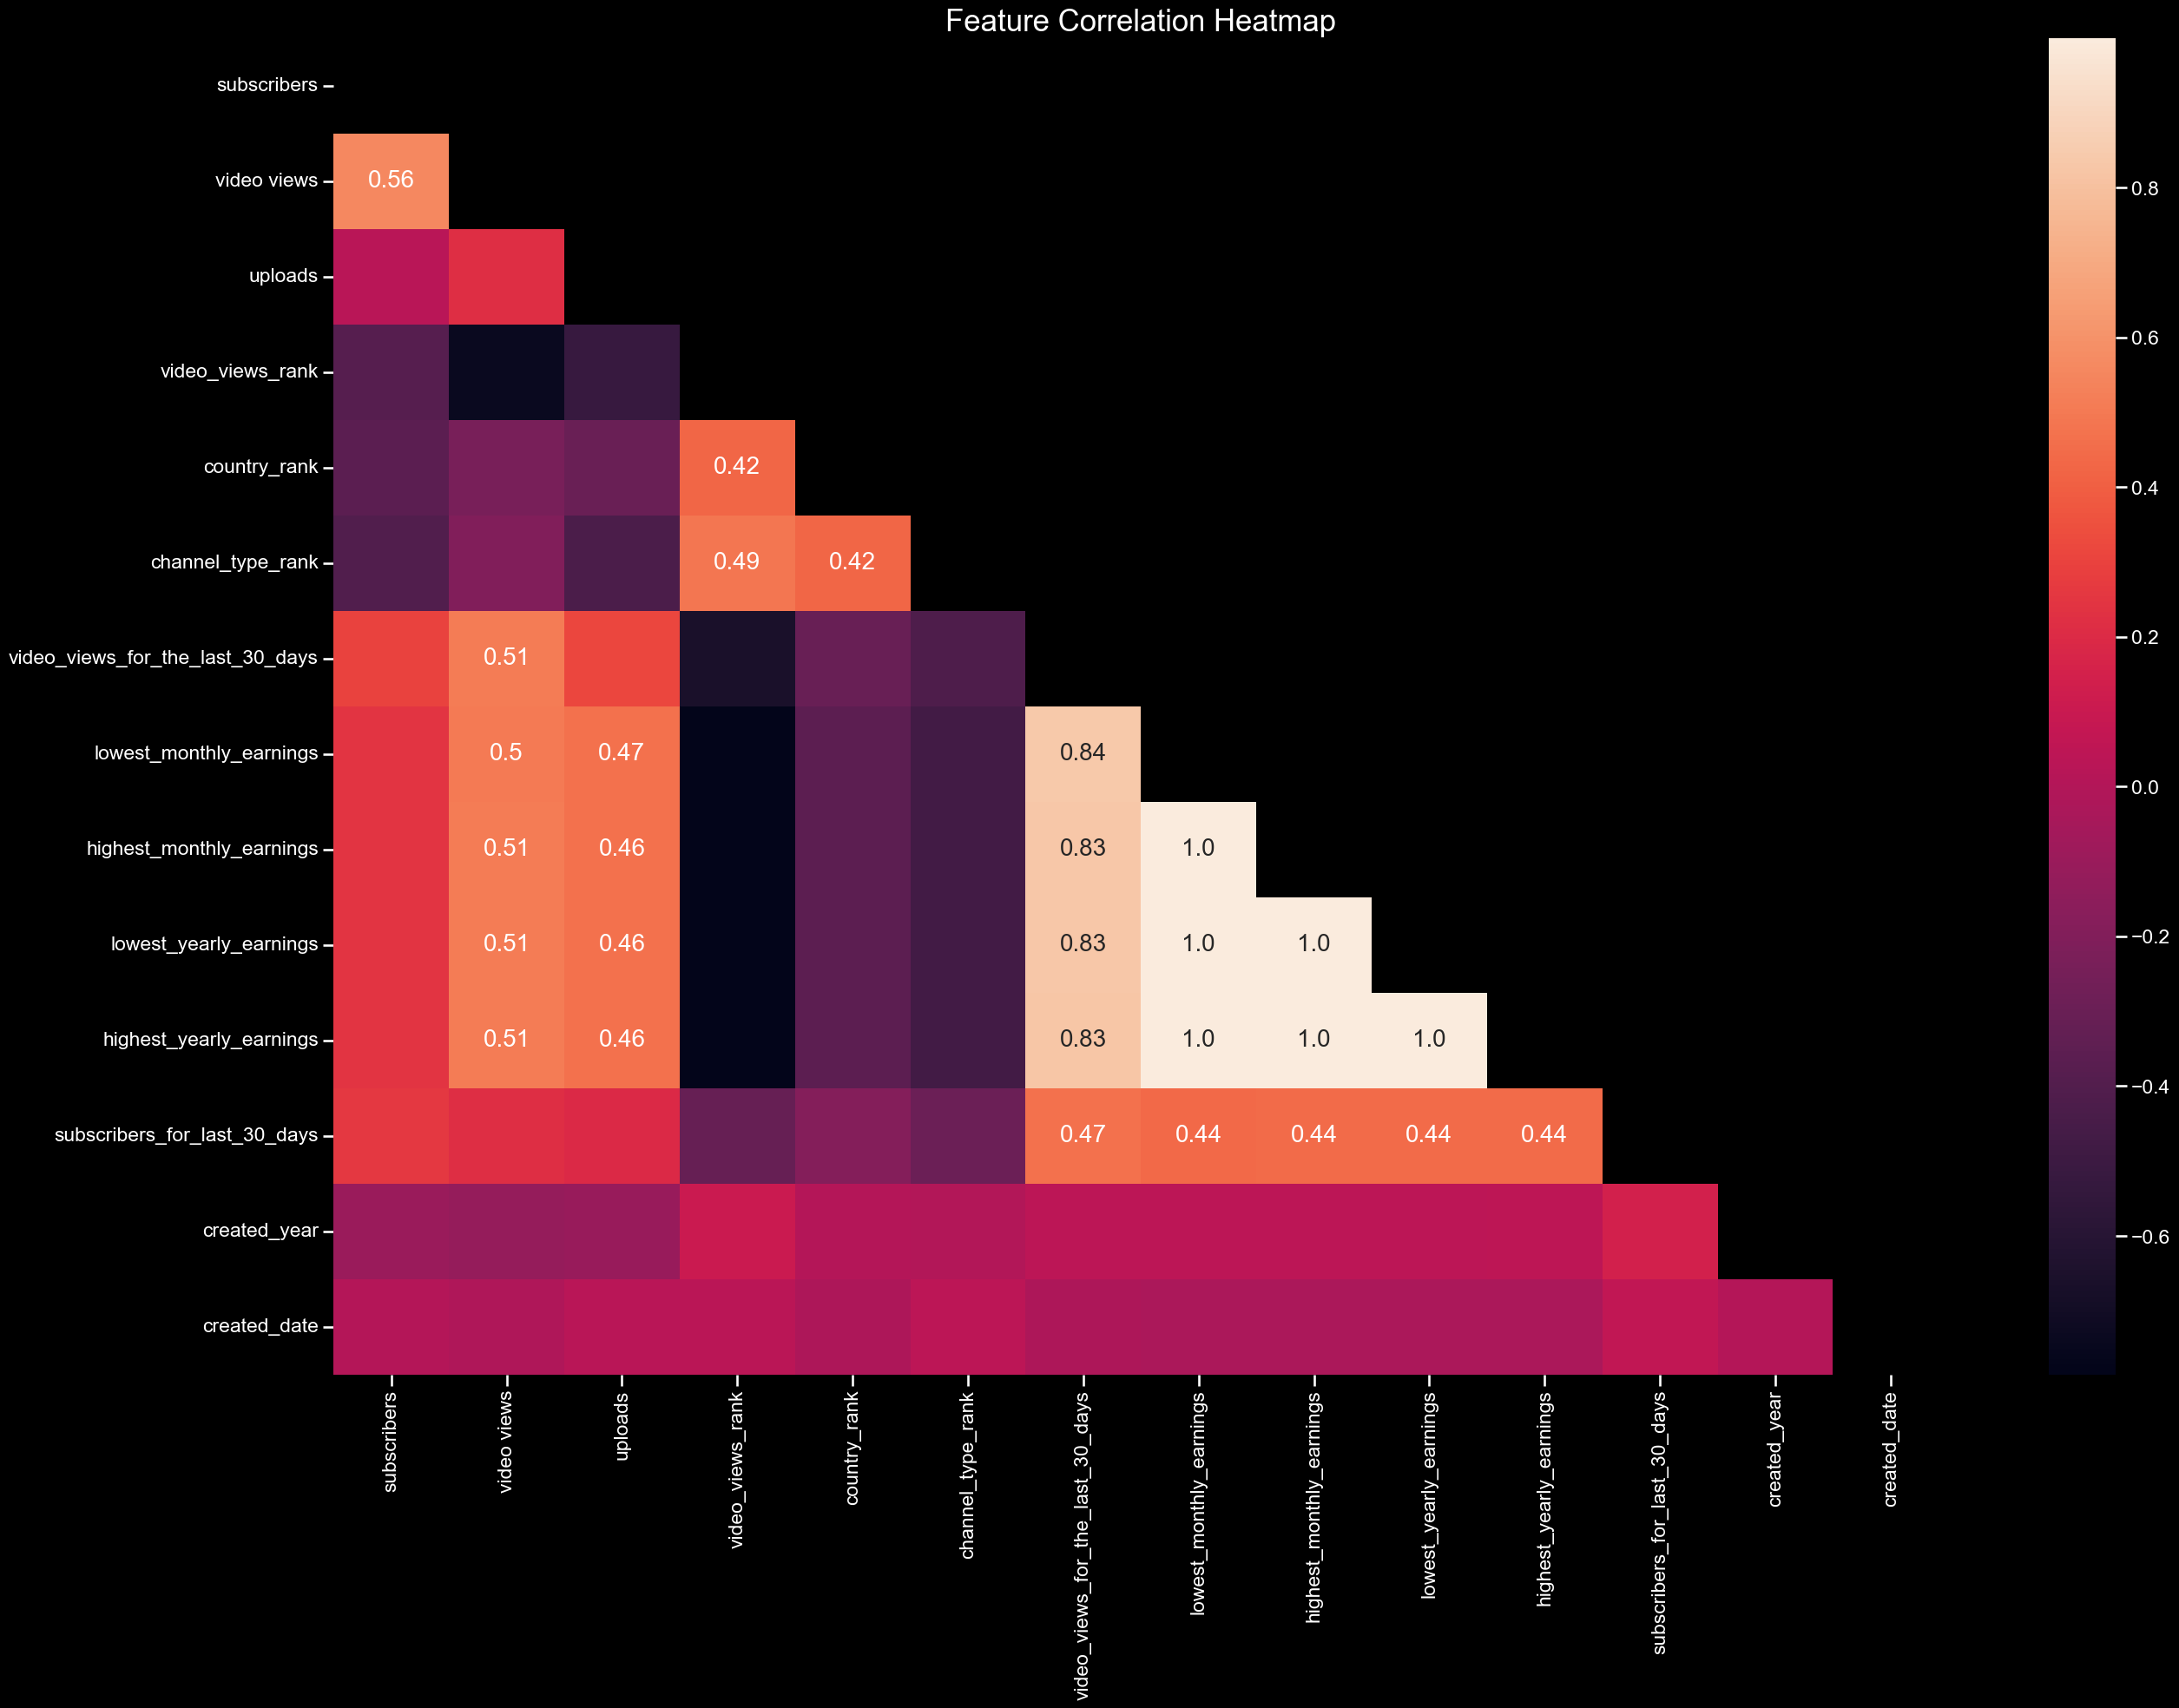

In [93]:
tmp = yt_df.copy()
tmp.drop(columns=[
    'rank','Youtuber','Title', 'category', 'Country', 'Abbreviation', 'channel_type', 'created_month',
    # 'country_rank', ''
      'Gross tertiary education enrollment (%)', 'Population', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'
], inplace=True)
df = tmp.corr('spearman')

# set style
sns.set(style="ticks", context="talk", rc={'figure.figsize':(30,20)})
plt.style.use("dark_background")

# masks
mask = np.triu(np.ones_like(df))

# hide the insignificant values
tmp = df[df > .4]
tmp = tmp.round(2)
tmp.fillna('', inplace=True)

annot_labels = tmp.values.astype('str').tolist()


g = sns.heatmap(df, cmap='rocket', annot=annot_labels,fmt='', mask=mask, annot_kws={"size": 20})
# g.axes.set_title('Feature Correlation Heatmap', fontsize=15);
plt.title('Feature Correlation Heatmap', fontsize=25);
# plt.rcParams.update({'font.size': 22})


## Metrics

### Subscribers vs video views

YouTube views & subscribers both follow a right-skewed distribution.

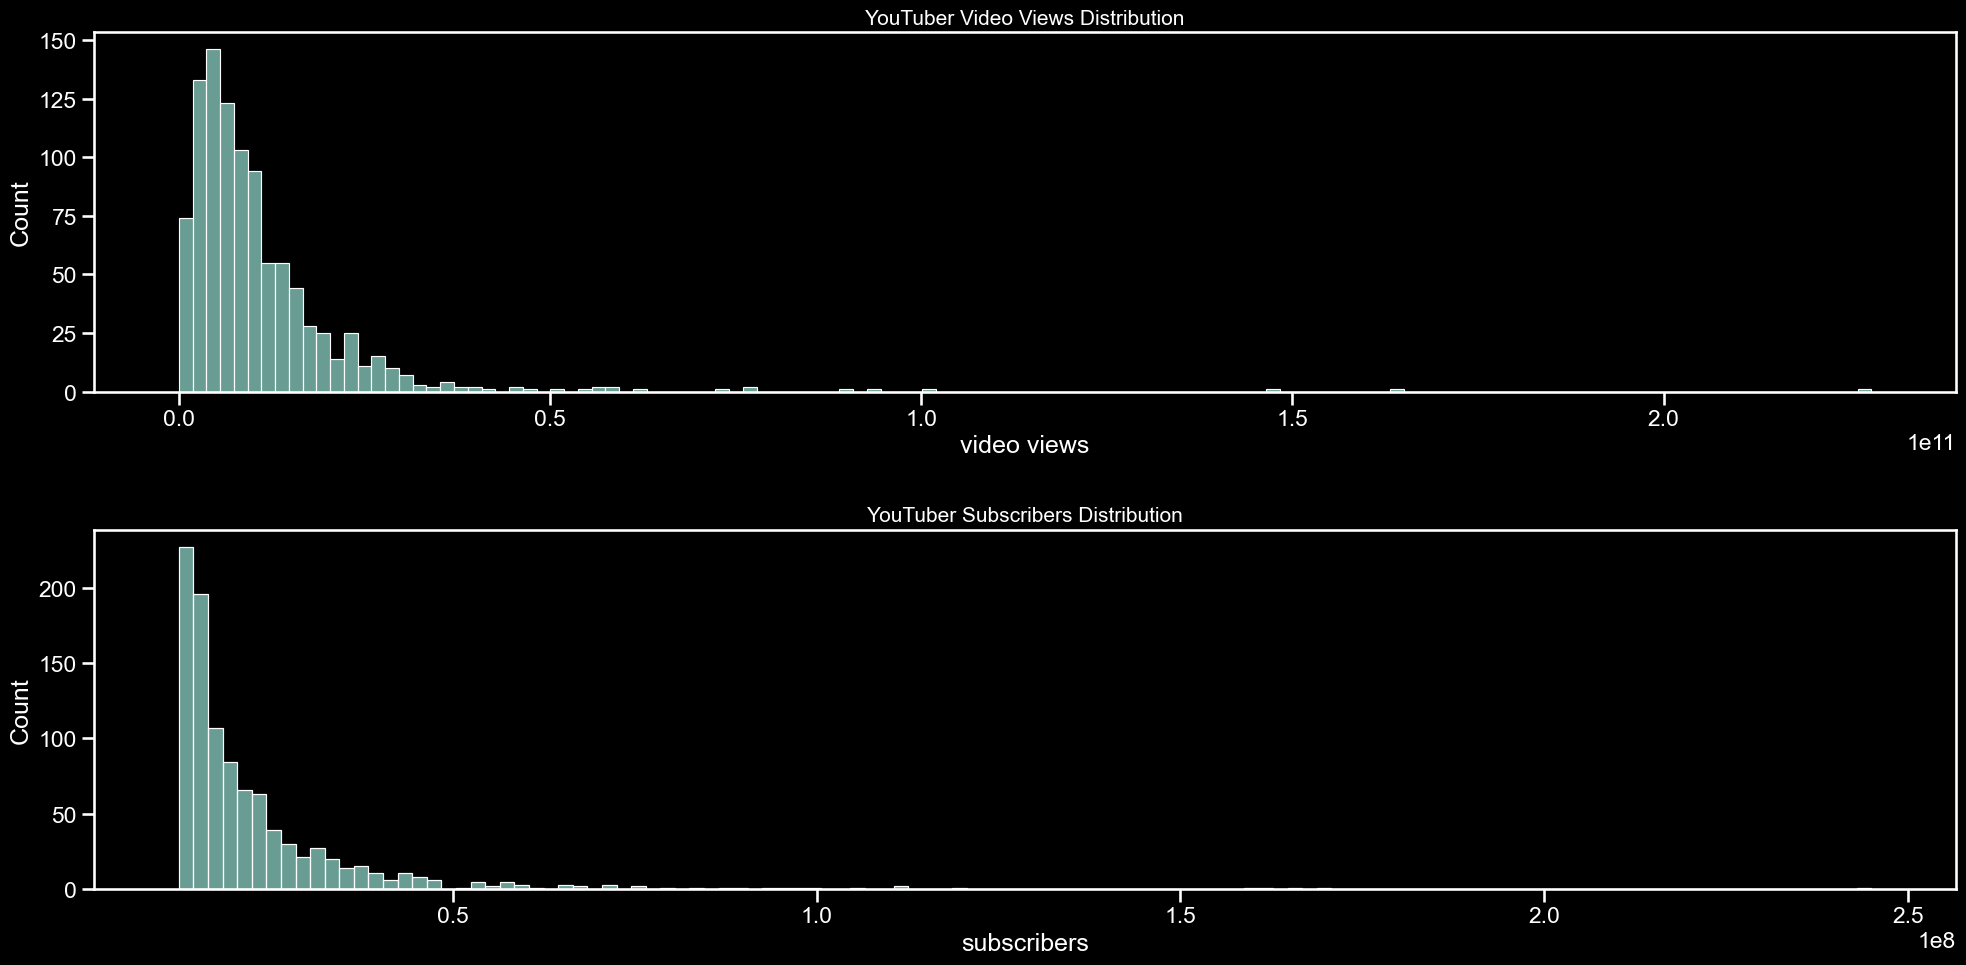

In [94]:

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")

fig, ax = plt.subplots(2,1, figsize=(20,10))

sns.histplot(
    ax=ax[0], 
    x='video views',
    data=yt_df,
)
ax[0].set_title('YouTuber Video Views Distribution', fontsize=15)

sns.histplot(
    ax=ax[1], 
    x='subscribers',
    data=yt_df,
)
ax[1].set_title('\nYouTuber Subscribers Distribution', fontsize=15)

fig.tight_layout();

it's already obvious that theres's a strong positive correlaion between the number of subscribers and video views.

what's more, more uploads don't necessarily translate to more views and subscribers

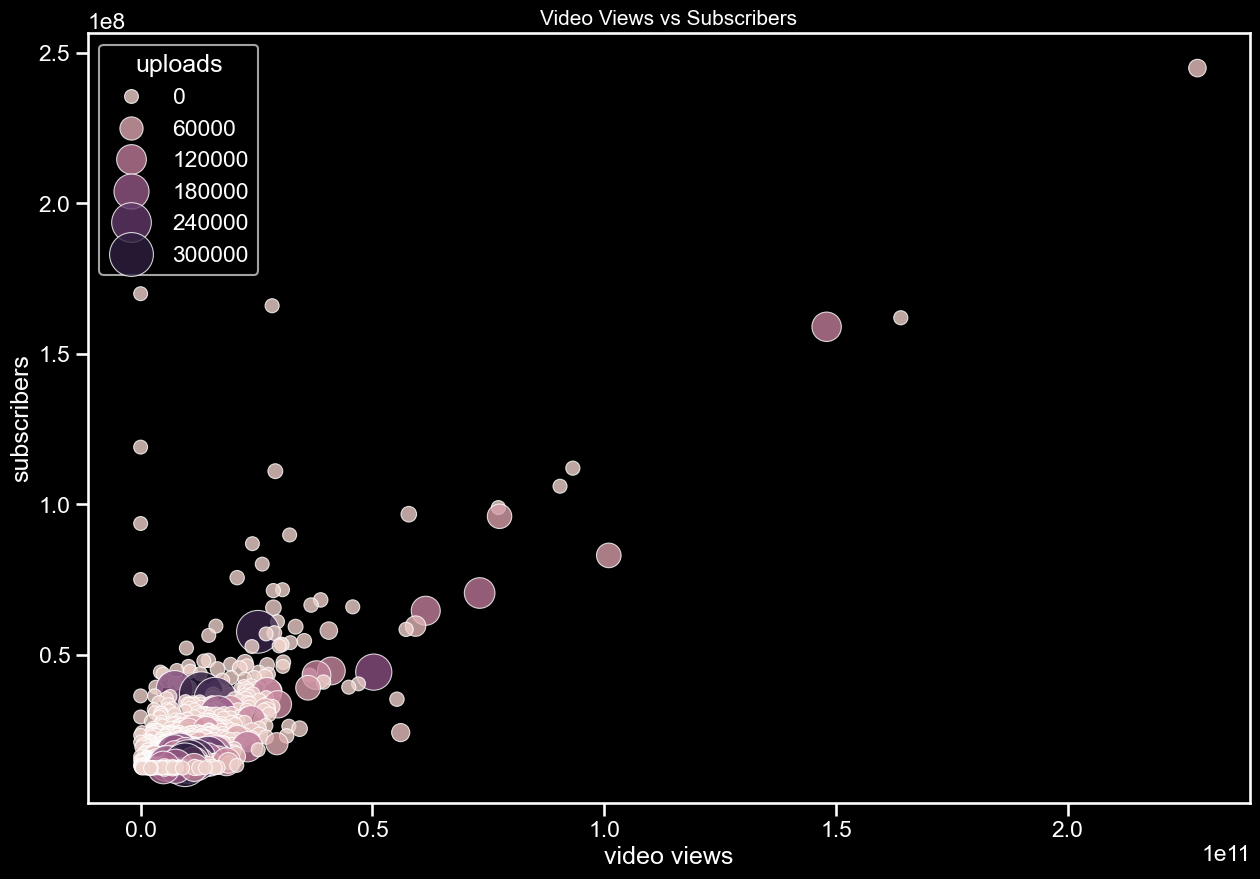

In [32]:

sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")
# sns.set()

g = sns.scatterplot(
    data=yt_df,
    x='video views',
    y='subscribers',
    hue='uploads',
    size='uploads',
    sizes=(100,1000),
    alpha=.8
)
g.axes.set_title('Video Views vs Subscribers', fontsize=15);

Same view view, but logarithmized

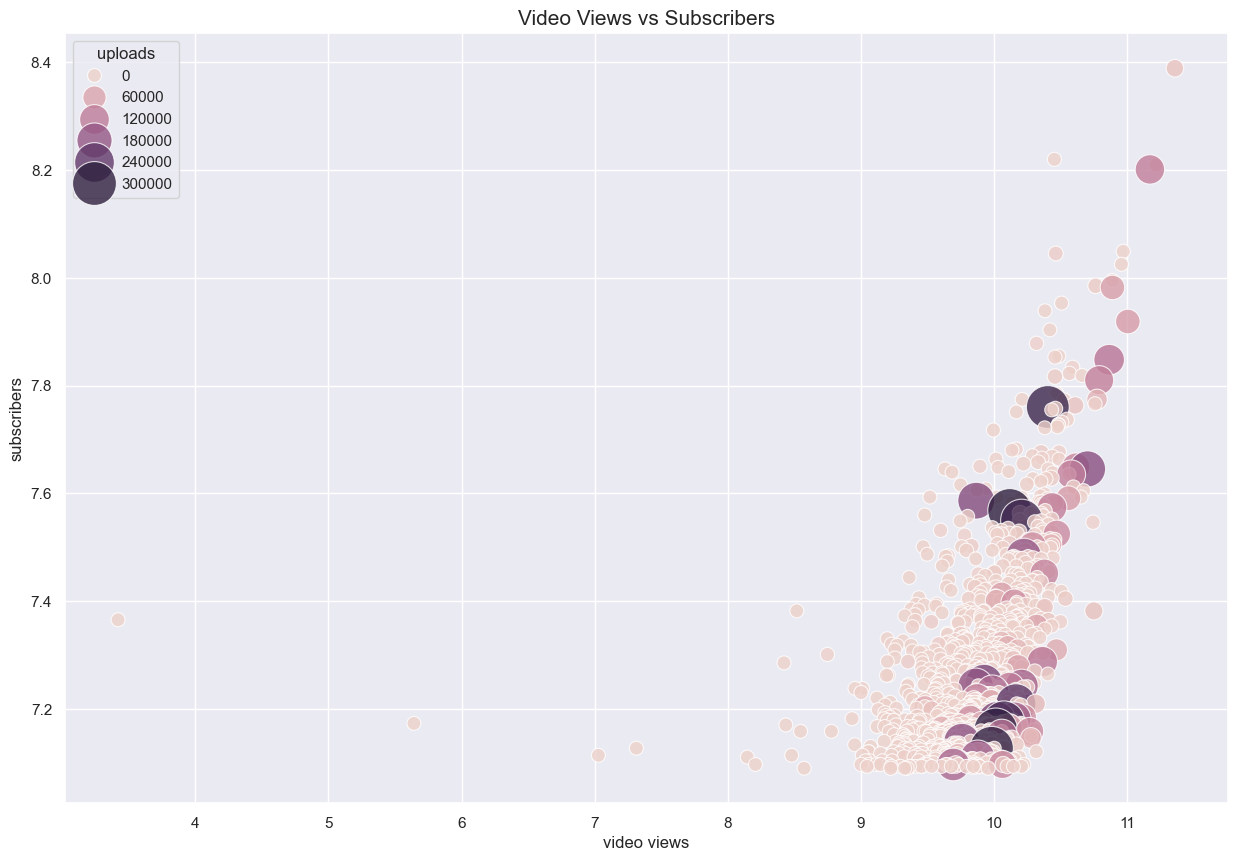

In [33]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15,10)})

tmp = yt_df.copy()[['video views', 'subscribers', 'uploads']]
tmp[['video views', 'subscribers']] = np.log10(tmp[['video views', 'subscribers']])

g = sns.scatterplot(
    data=tmp,
    x='video views',
    y='subscribers',
    hue='uploads',
    size='uploads',
    sizes=(100,1000),
    alpha=.8
)
g.axes.set_title('Video Views vs Subscribers', fontsize=15);

## Channels

### Individual Accounts

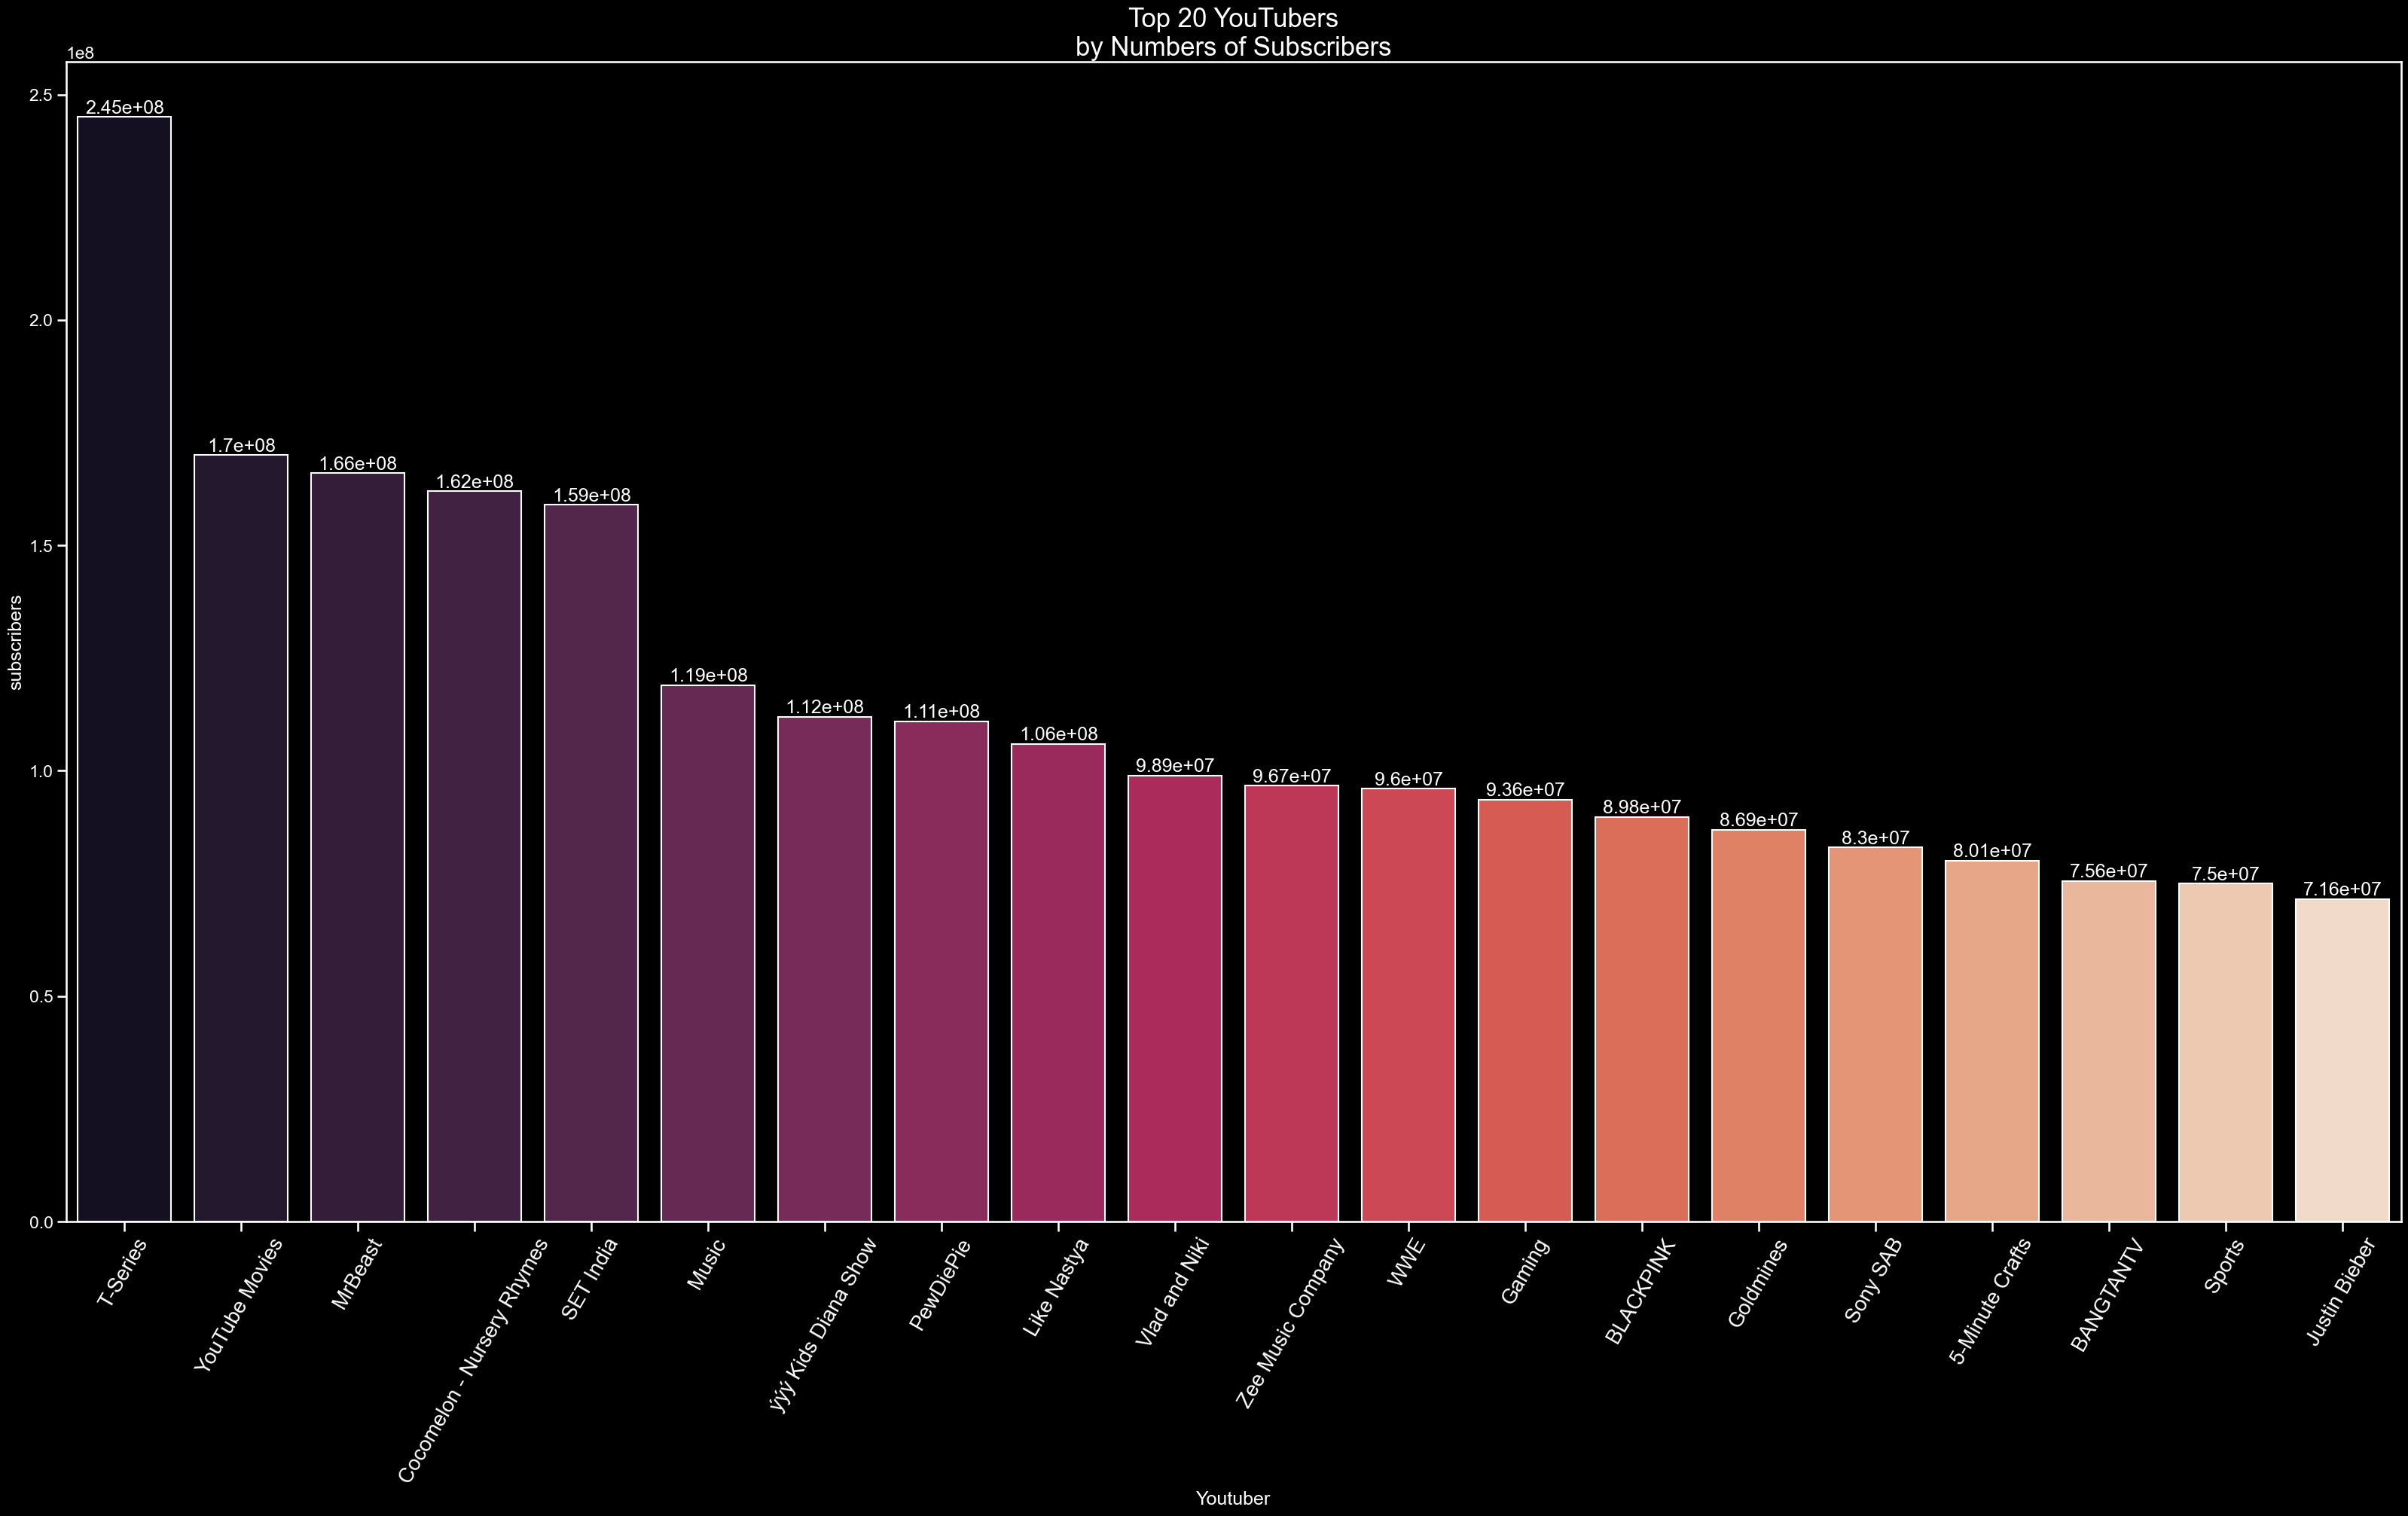

In [216]:
sns.set(style="ticks", context="talk",  rc={'figure.figsize':(40,20)})
plt.style.use("dark_background")

g = sns.barplot(
    data=yt_df[:20],
    y='subscribers',
    x='Youtuber',
    palette='rocket'
    # orient='h'
)

# value labels
for container in g.containers:
    g.bar_label(container)
g.set_xticklabels(yt_df.loc[:50, 'Youtuber'], rotation=60, fontsize=20)
plt.title('Top 20 YouTubers\nby Numbers of Subscribers', fontsize=25);

# g.axes.set_title('Top 20 YouTubers\nby Numbers of Subscribers', fontsize=15);

### By Category

Text(0.5, 1.0, 'Number of Subscribers by Category')

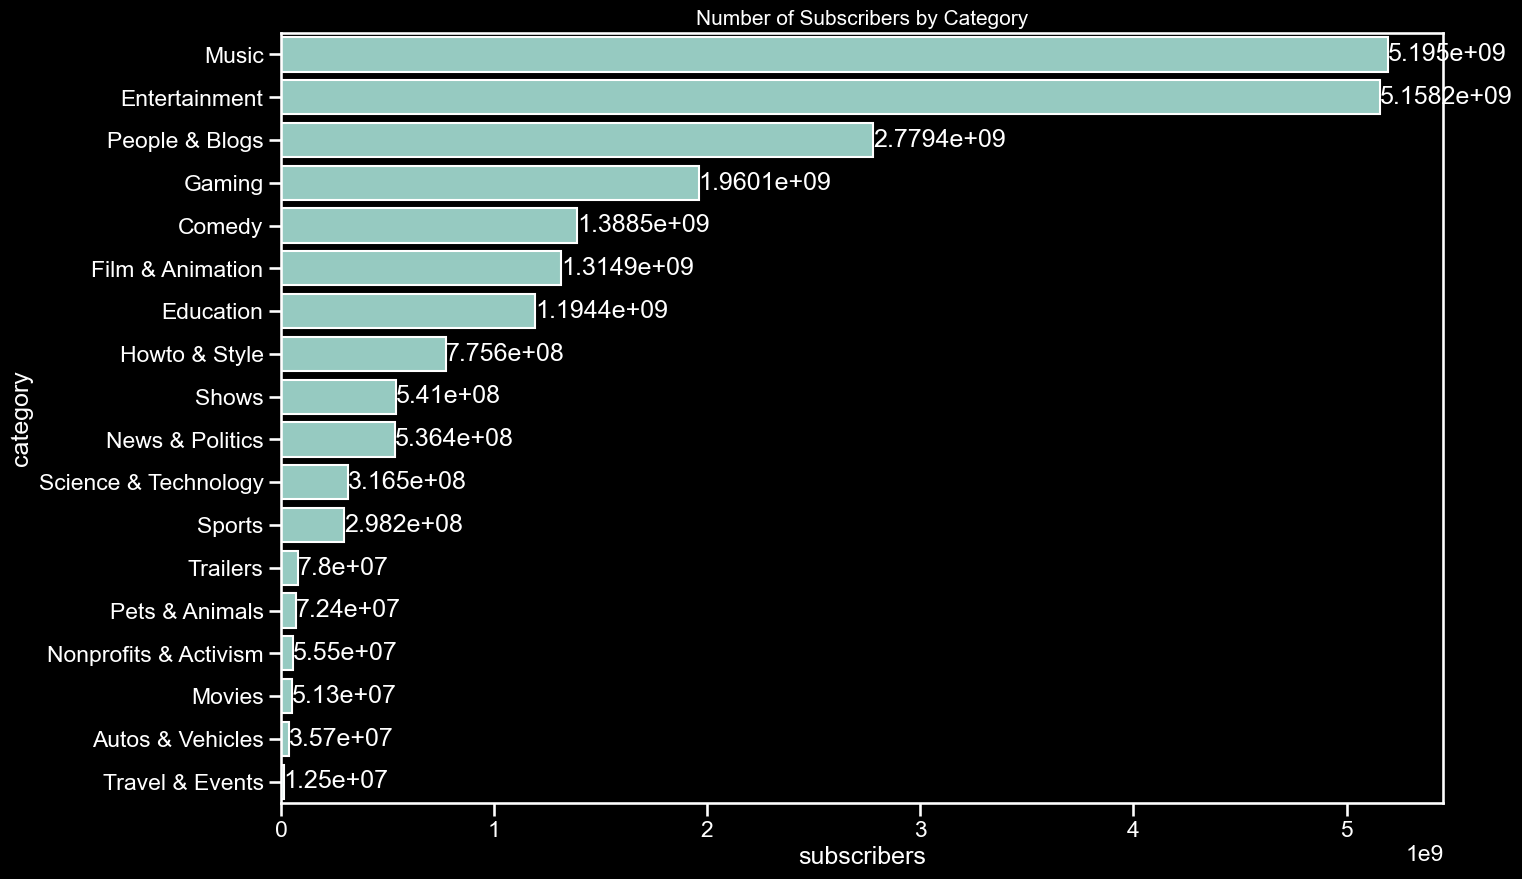

In [74]:
tmp = yt_df[['subscribers', 'category']].groupby(['category']).sum()
tmp.sort_values(by='subscribers', ascending=False, inplace=True)


sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")

# sns.set_theme()
# sns.set(rc={'figure.figsize':(15,10)})

g = sns.barplot(
    tmp,
    y='category',
    x='subscribers'
)

for container in g.containers:
    g.bar_label(container)
    
g.axes.set_title('Number of Subscribers by Category',fontsize=15)

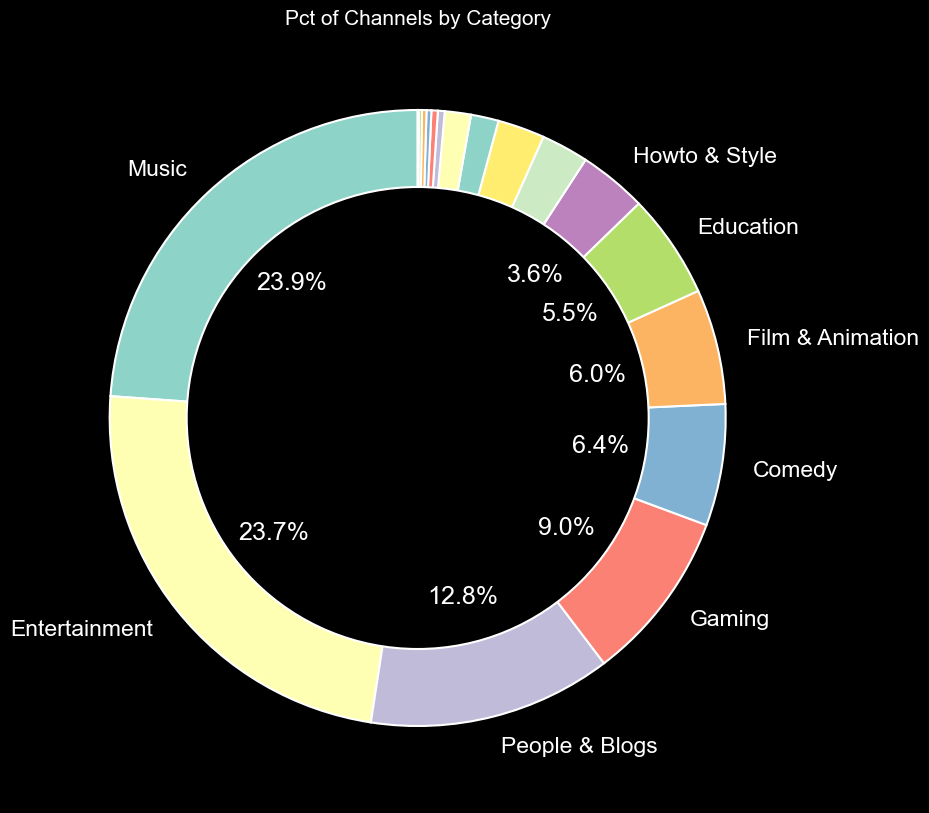

In [95]:
tmp = yt_df[['subscribers', 'category']].groupby(['category']).sum()
tmp.sort_values(by='subscribers', ascending=False, inplace=True)
tmp.reset_index(inplace=True)


# def autopct_more_than_1(pct):
#     return ('%1.f%%' % pct) if pct > 1  else ''


sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")


# sns.set(rc={'figure.figsize':(15,10)})
fig1,ax = plt.subplots()
# p,t,a = ax.pie(tmp['subscribers'], autopct=autopct_more_than_1, labels=tmp['category'])
# h,l = zip(*[(h,lab) for h,lab,i in zip(p, tmp['category'].values, tmp['subscribers']) if i > 1])


wedges, texts, autotexts = ax.pie(tmp['subscribers'], labels=tmp['category'], autopct='%1.1f%%', startangle=90)

threshold = 2.6
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) <= threshold:
        label.set_text('')
        pct_label.set_text('')


# draw a circle
centre_circle = plt.Circle((0,0),0.75,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax.set_title("Pct of Channels by Category",fontsize=15)
plt.show();

### By Country

Text(0.5, 1.0, 'Top 10 Countries with the Highest Number of Subscribers')

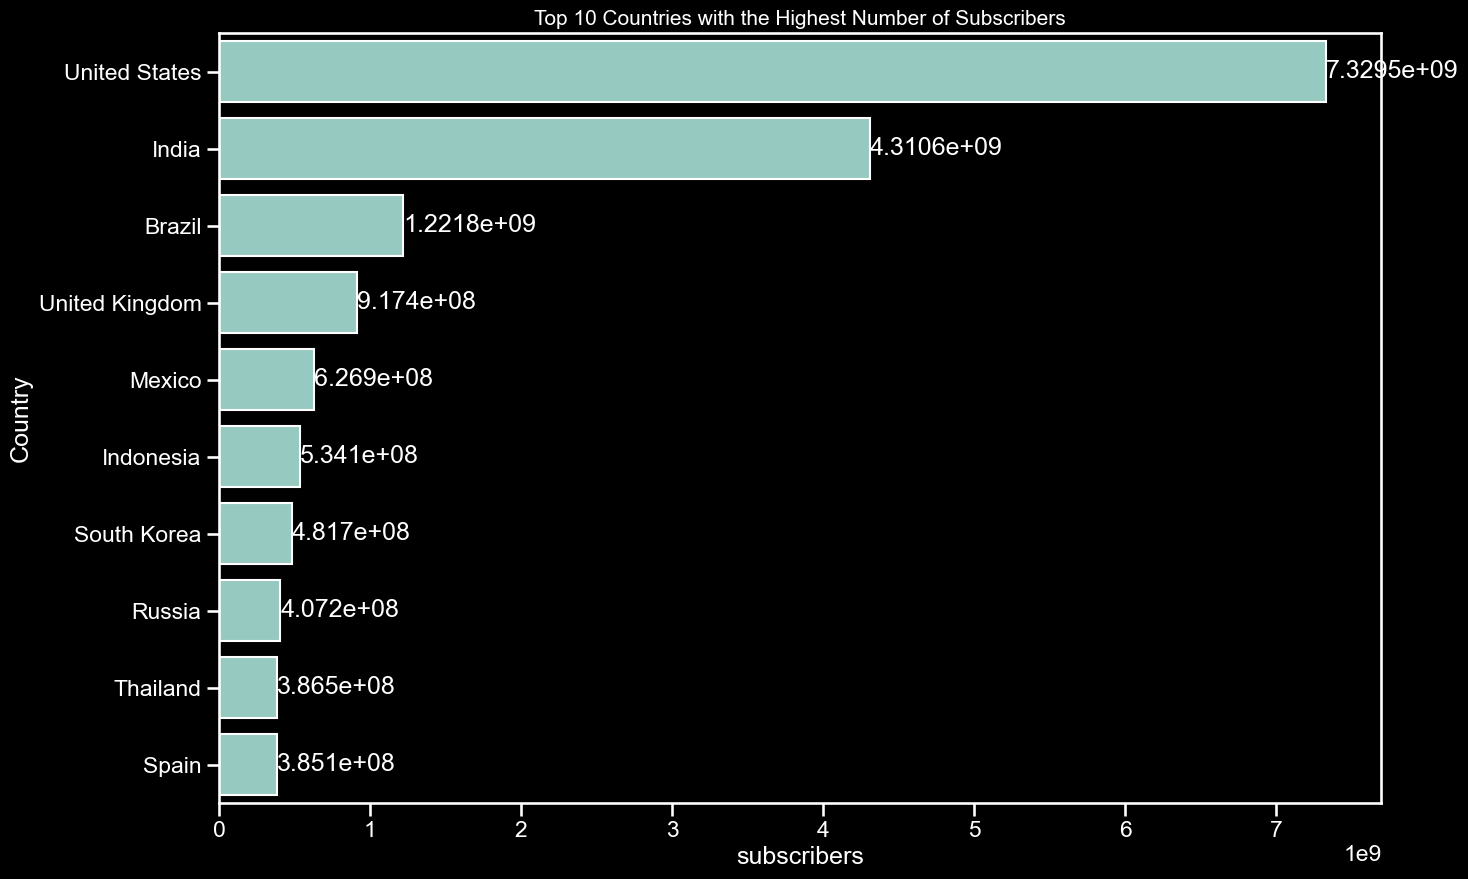

In [76]:
tmp = yt_df[['subscribers', 'Country']].groupby(['Country']).sum()
tmp.sort_values(by='subscribers', ascending=False, inplace=True)


sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")


g = sns.barplot(
    tmp[:10],
    y='Country',
    x='subscribers'
)

for container in g.containers:
    g.bar_label(container)
    
g.axes.set_title('Top 10 Countries with the Highest Number of Subscribers',fontsize=15)

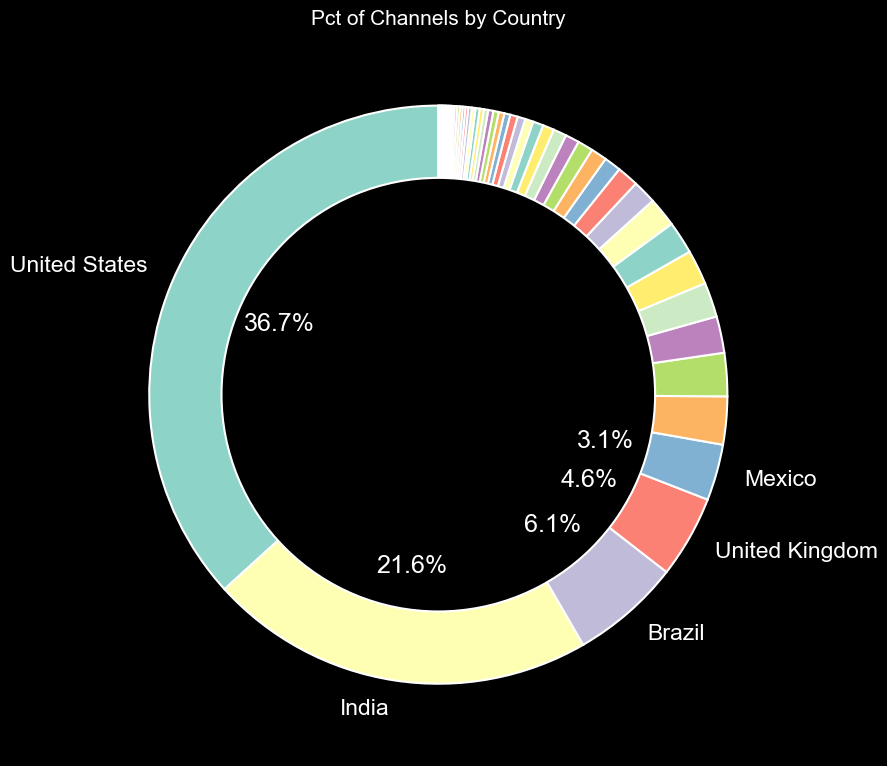

In [72]:
tmp = yt_df[['subscribers', 'Country']].groupby(['Country']).sum()
tmp.sort_values(by='subscribers', ascending=False, inplace=True)
tmp = tmp.reset_index()


# def autopct_more_than_3(pct):
#     return ('%1.f%%' % pct) if pct > 2  else ''


sns.set(style="ticks", context="talk", rc={'figure.figsize':(10,8)})
plt.style.use("dark_background")

fig1,ax = plt.subplots()
# p,t,a = ax.pie(tmp['subscribers'], shadow=True, autopct=autopct_more_than_3, labels=tmp['Country'])
# h,l = zip(*[(h,lab) for h,lab,i in zip(p, tmp['Country'].values, tmp['subscribers']) if i > 3])


wedges, texts, autotexts = ax.pie(tmp['subscribers'], labels=tmp['Country'], autopct='%1.1f%%', startangle=90)

threshold = 3
for label, pct_label in zip(texts, autotexts):
    pct_value = pct_label.get_text().rstrip('%')
    if float(pct_value) <= threshold:
        label.set_text('')
        pct_label.set_text('')


# for autotext in autotexts:
#     autotext.set_color('grey')

# draw a circle
centre_circle = plt.Circle((0,0),0.75,fc='black')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# ax.legend(h, l,loc="best", bbox_to_anchor=(1,1))
ax.set_title("Pct of Channels by Country", fontsize=15)
plt.tight_layout()

plt.show();

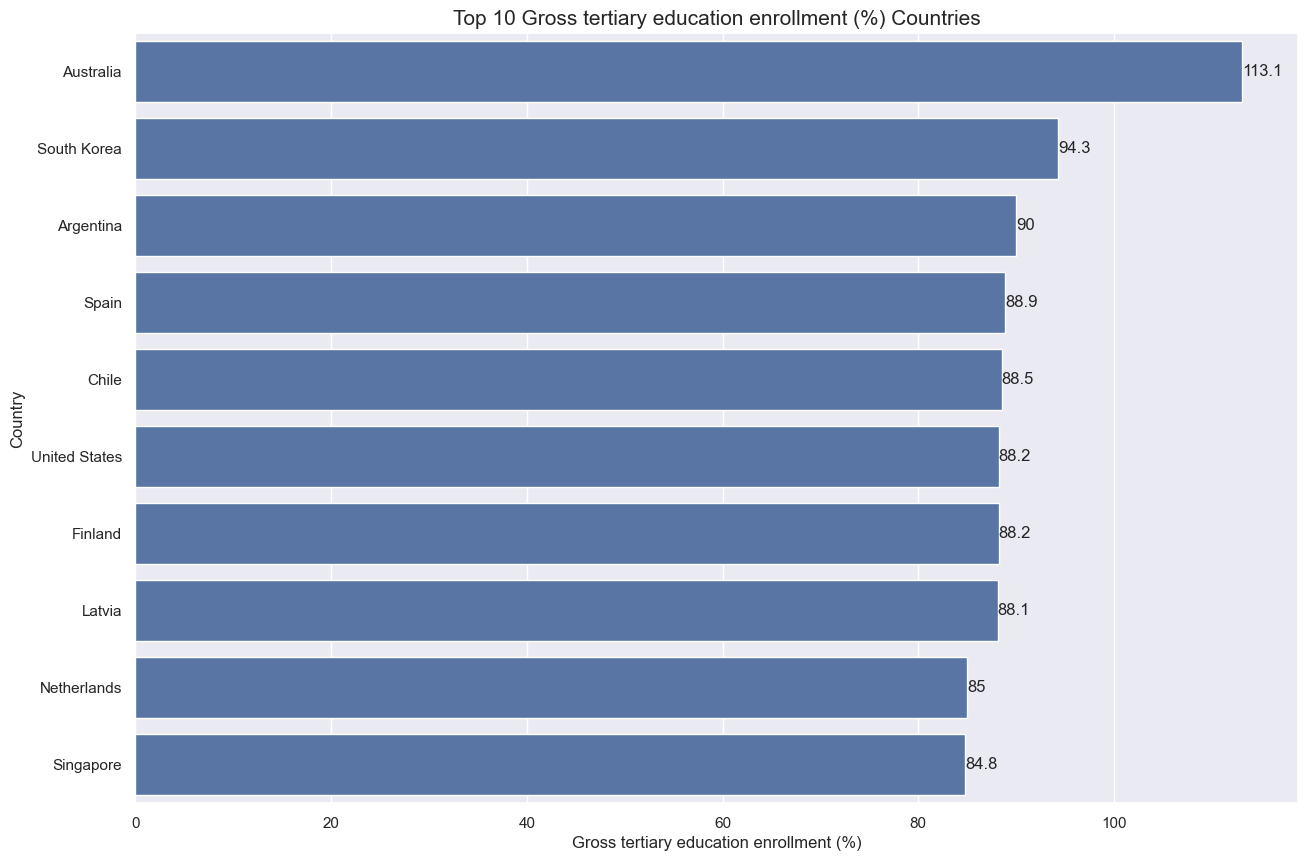

In [168]:
sns.set_theme()
sns.set(rc={'figure.figsize':(15,10)})

tmp = yt_df.copy()[['Country', 'Gross tertiary education enrollment (%)']]
tmp = tmp.groupby(['Country']).mean()
tmp = tmp.sort_values(by=['Gross tertiary education enrollment (%)'], ascending=False)
tmp = tmp.reset_index()

# fig, g = plt.subplots(figsize=(15,20))
g = sns.barplot(
    data=tmp[:10],
    x='Gross tertiary education enrollment (%)',
    y='Country',
    # hue='uploads'
)

for container in g.containers:
    g.bar_label(container)

g.axes.set_title('Top 10 Gross tertiary education enrollment (%) Countries', fontsize=15);

## Start Year

In [169]:
yt_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

## Subscribers for the last 30 days

In [183]:
yt_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

Text(0.5, 1.0, 'Subscribers for the last 30 days vs Total Subscribers')

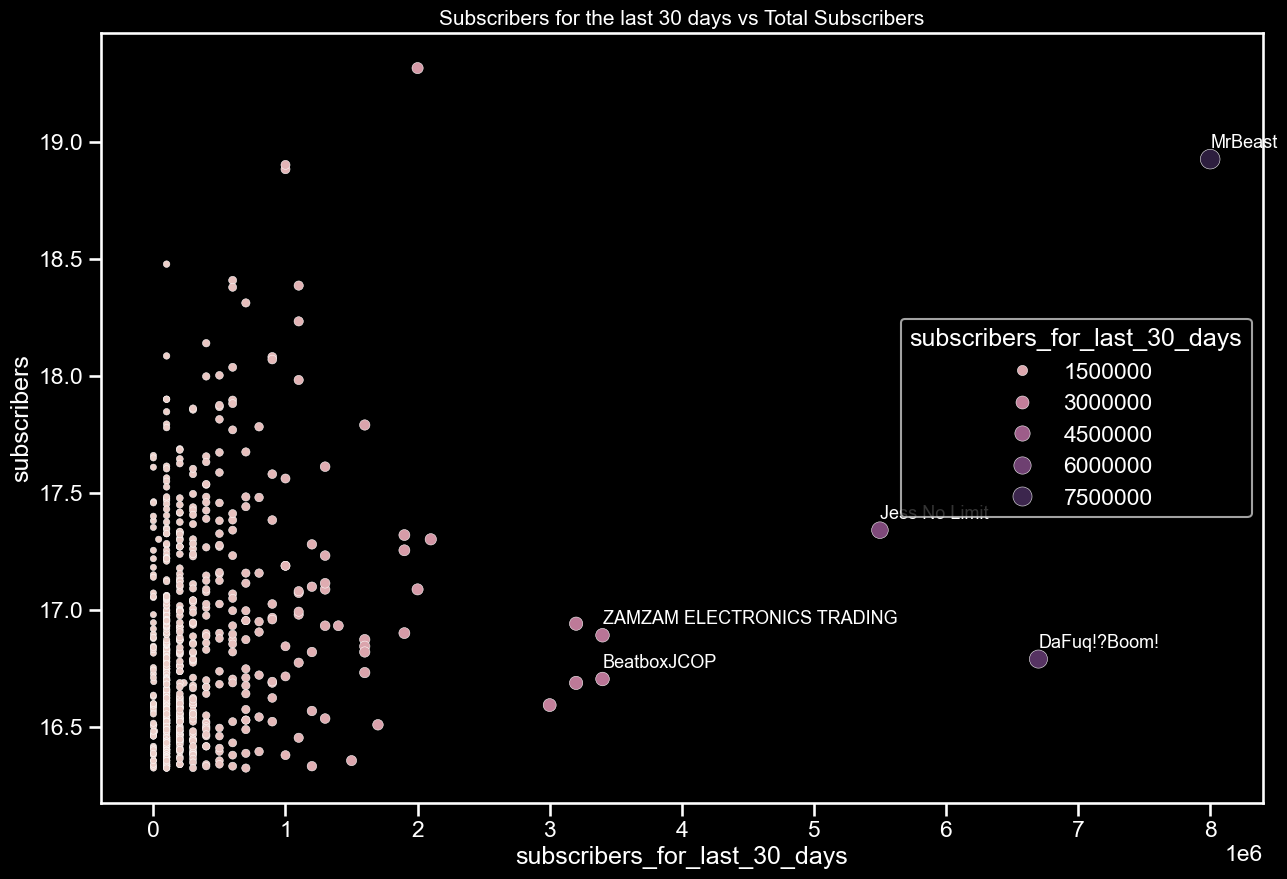

In [22]:


tmp = yt_df[['Youtuber', 'Country', 'subscribers','subscribers_for_last_30_days']]
tmp = tmp.sort_values(by=['subscribers_for_last_30_days'],ascending=False).reset_index()
tmp['subscribers'] = np.log(tmp['subscribers'])
# tmp['subscribers_for_last_30_days'] = np.log(tmp['subscribers_for_last_30_days'])

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


ax = sns.scatterplot(
    data=tmp,
    x='subscribers_for_last_30_days',
    y='subscribers',
    size='subscribers_for_last_30_days',
    hue='subscribers_for_last_30_days',
    # legend='full'
sizes=(20, 200),
)

for i in range(5):
    plt.text(
        x=tmp.loc[i,'subscribers_for_last_30_days'],
        y=tmp.loc[i,'subscribers']+.05,
        s= tmp.loc[i, 'Youtuber'],
        # alpha=.5
        size=13
    )

# plt.text(df.G[df.Team==’LIV’],df.GA[df.Team==’LIV’],”LIV”, 
#  fontdict=dict(color=’black’, alpha=0.5, size=16))
ax.set_title('Subscribers for the last 30 days vs Total Subscribers', fontsize=15)

# savefig('demo.png', transparent=True)


add a column for the % growth
- 100k might be nothing for a channel like mr beast
- but it's a whole lot for someone whos just starting

In [289]:
tmp[:5]

,index,Youtuber,Country,subscribers,subscribers_for_last_30_days,subscribers_for_last_30_days_gorwth_pct
0,417,DaFuq!?Boom!,United States,19600000,6700000.0,0.341837
1,483,BeatboxJCOP,NaN,18000000,3400000.0,0.188889
2,598,Panda Shorts,Sweden,16100000,3000000.0,0.186335
3,495,ýýýýýýýýý KIMPRO,South Korea,17700000,3200000.0,0.180791
4,117,Jess No Limit,Indonesia,34000000,5500000.0,0.161765


Text(0.5, 1.0, 'Pct Subscribers for the last 30 days vs Total Subscribers')

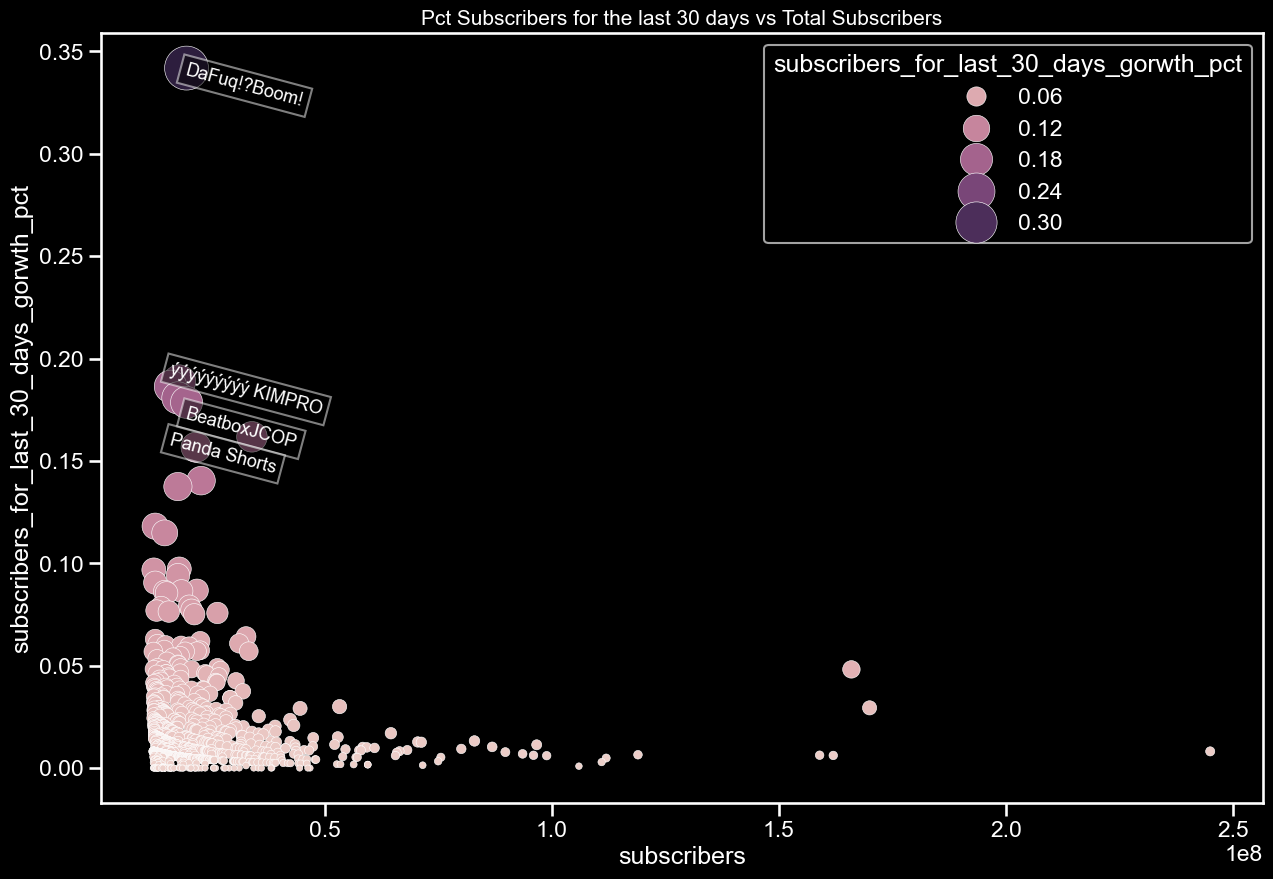

In [97]:
tmp = yt_df[['Youtuber', 'Country', 'subscribers','subscribers_for_last_30_days']]
tmp['subscribers_for_last_30_days_gorwth_pct'] = tmp['subscribers_for_last_30_days']/tmp['subscribers'] 
tmp.sort_values(by=['subscribers_for_last_30_days_gorwth_pct'], ascending=False, inplace=True)
tmp.reset_index(inplace=True)


sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


ax = sns.scatterplot(
    data=tmp,
    x='subscribers',
    y='subscribers_for_last_30_days_gorwth_pct',
    size='subscribers_for_last_30_days_gorwth_pct',
    hue='subscribers_for_last_30_days_gorwth_pct',
    sizes=(20, 1000),
)


for i in range(4):
    if i==1:
        y=tmp.loc[i,'subscribers_for_last_30_days_gorwth_pct'] -.015
    elif i == 2:
        y=tmp.loc[i,'subscribers_for_last_30_days_gorwth_pct'] -.025
        x=tmp.loc[i,'subscribers'] - .1*np.exp(1)**8
    elif i ==3:
        # ha='right'
        y=tmp.loc[i,'subscribers_for_last_30_days_gorwth_pct'] +.015
    elif i == 4:
        y=tmp.loc[i,'subscribers_for_last_30_days_gorwth_pct'] -.015
    else:
        x=tmp.loc[i, 'subscribers']
        y=tmp.loc[i,'subscribers_for_last_30_days_gorwth_pct']
    # elif i==2:
    #     ha='right'
    #     x=tmp.loc[i,'subscribers'] 

    plt.text(
        x=x,
        y=y,
        s= tmp.loc[i, 'Youtuber'],
        size=13,
        bbox=dict(facecolor='black',alpha=0.5),
        wrap=True,
        va='center_baseline',
        ha='left',
        rotation=-15,
    )

# plt.text(df.G[df.Team==’LIV’],df.GA[df.Team==’LIV’],”LIV”, 
#  fontdict=dict(color=’black’, alpha=0.5, size=16))
ax.set_title('Pct Subscribers for the last 30 days vs Total Subscribers', fontsize=15)

## Earnings

In [100]:
yt_df.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'Abbreviation', 'channel_type',
       'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

highest monthly earnings are more strongly correlated to video views than subscribers

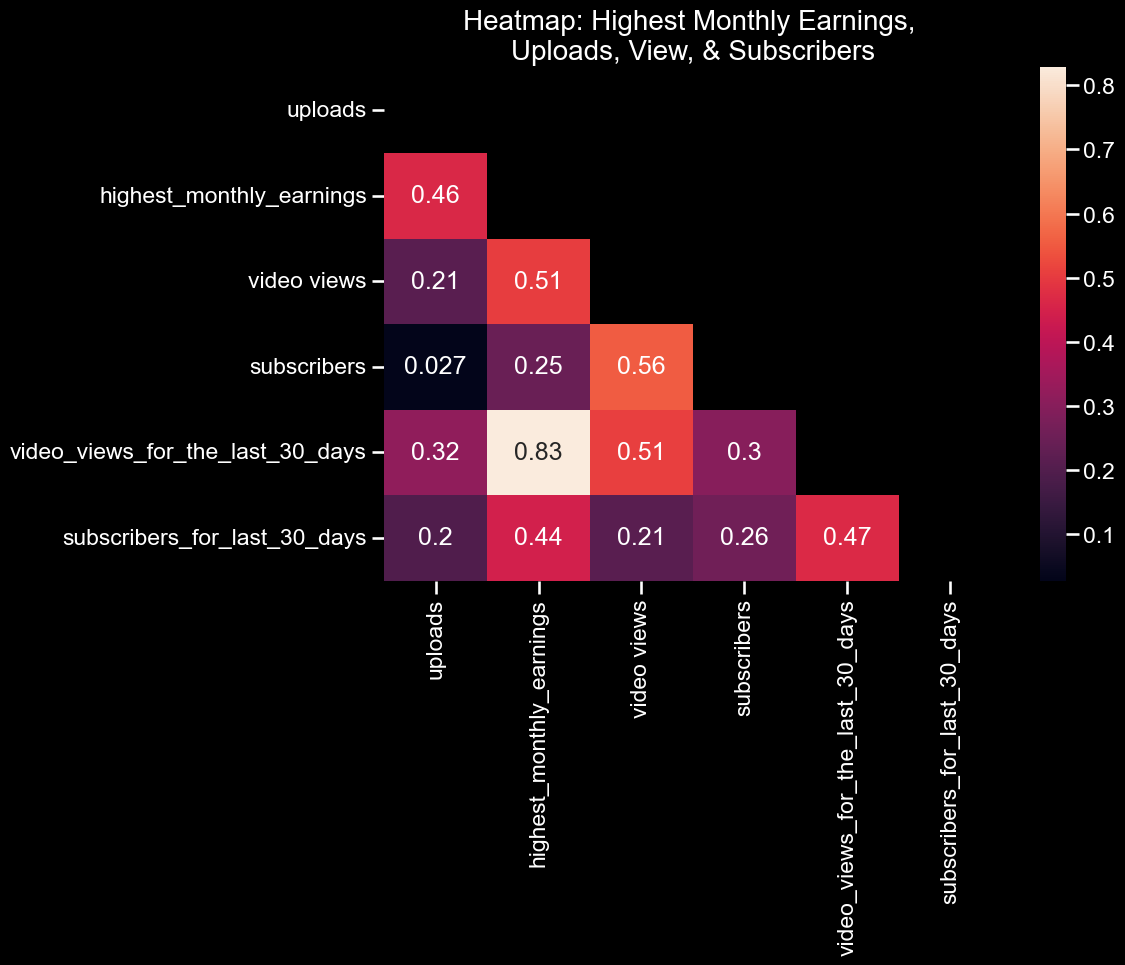

In [213]:

df = yt_df[['uploads', 'highest_monthly_earnings', 'video views', 'subscribers', 'video_views_for_the_last_30_days', 'subscribers_for_last_30_days']].corr('spearman')
mask = np.triu(np.ones_like(df))

sns.set(style="ticks", context="talk", rc={'figure.figsize':(12,10)})
plt.style.use("dark_background")

g = sns.heatmap(df, cmap='rocket', annot=True, mask=mask)
g.axes.set_title('Heatmap: Highest Monthly Earnings, View, Subscribers', fontsize=12);
# g.set_title('Heatmap: Earnings, View, Subscribers')
plt.title('Heatmap: Highest Monthly Earnings, \nUploads, View, & Subscribers', fontsize=20)
plt.tight_layout();

In [225]:
yt_df[yt_df['uploads']==0][['uploads', 'Youtuber','video views', 'video_views_for_the_last_30_days']][:10]

,uploads,Youtuber,video views,video_views_for_the_last_30_days
5,0,Music,0.000000e+00,1.277837e+09
12,0,Gaming,0.000000e+00,6.067720e+08
57,0,BRIGHT SIDE,1.070853e+10,7.356210e+08
73,0,Luisito Comunica,8.670474e+09,5.227400e+07
102,0,News,0.000000e+00,9.517250e+07
113,0,T-Series Apna Punjab,2.130632e+10,1.676535e+08
149,0,Luis Fonsi,1.517676e+10,1.750255e+08
166,0,Frost Diamond,7.277494e+09,1.082370e+08
180,0,Aditya Music India,2.585799e+10,6.813150e+07
190,0,Sandeep Maheshwari,2.303069e+09,1.283260e+08


filter out the data points where uploads = 0 first

In [1]:
tmp = yt_df[~(yt_df['uploads']==0)]

sns.regplot(
    y=tmp['highest_monthly_earnings'],
    x=tmp['uploads']
)

NameError: name 'yt_df' is not defined

remember that there're NAs in `video_views_for_the_last_30_days`. 
let's not use those rows.

In [75]:
yt_df[yt_df['highest_monthly_earnings']==0]['video_views_for_the_last_30_days']

5              NaN
12             NaN
16             1.0
23     447223000.0
51             1.0
          ...     
957    565459000.0
967            1.0
975            NaN
983            NaN
985            NaN
Name: video_views_for_the_last_30_days, Length: 89, dtype: float64

In [74]:
tmp = yt_df[yt_df['highest_monthly_earnings'].isna()]['video_views_for_the_last_30_days']
tmp

Series([], Name: video_views_for_the_last_30_days, dtype: float64)

<Axes: xlabel='video_views_for_the_last_30_days', ylabel='highest_monthly_earnings'>

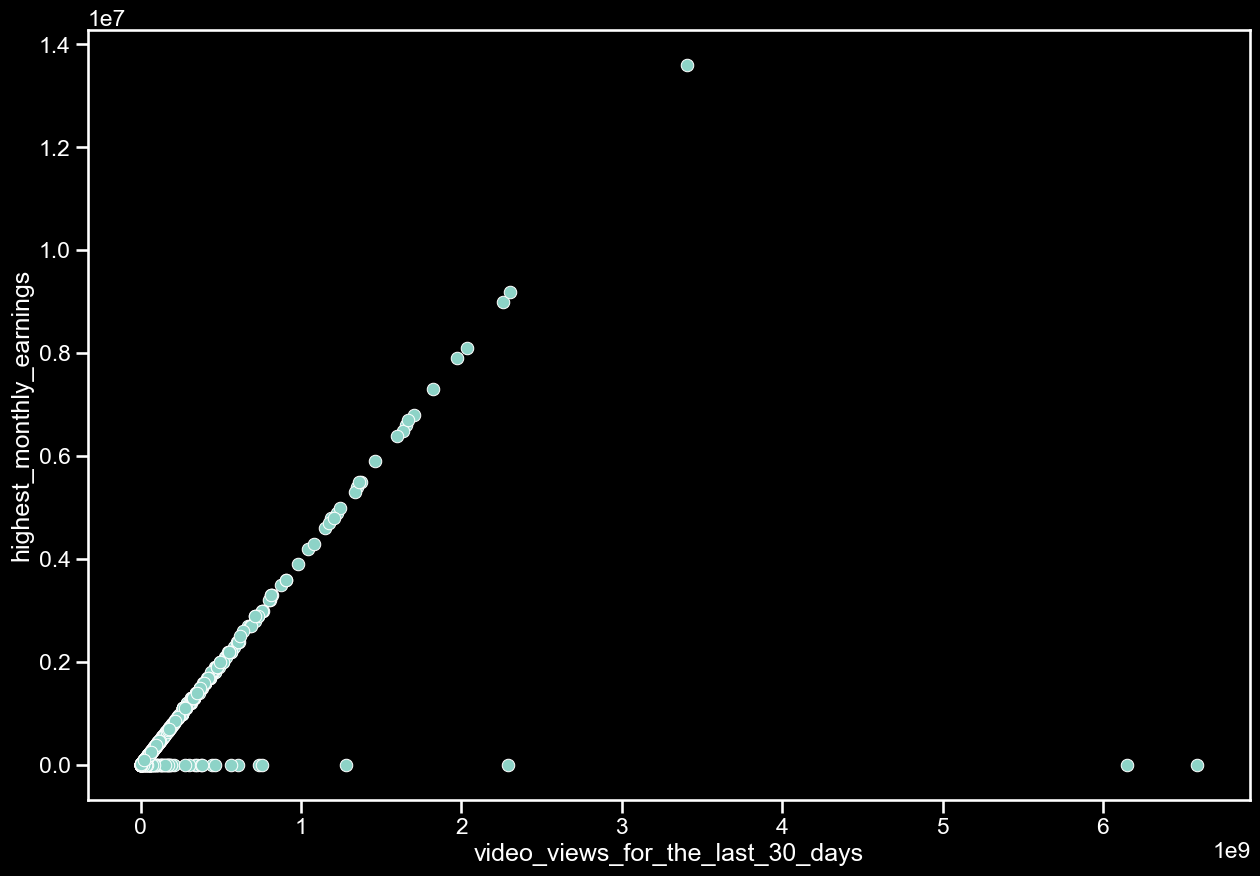

In [119]:
sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")

sns.scatterplot(
    data=yt_df,
    y='highest_monthly_earnings',
    x='video_views_for_the_last_30_days'
)

recall in the `feature engineering` step, we observed that there're some channels with their `highest_yearly_earnings` being 0. upon a closer look, these channels actually have no monetary info.

we'll ignore these rows in the next steps

In [125]:
yt_df.sort_values(by=['highest_monthly_earnings'])\
    [['Youtuber', 'video_views_for_the_last_30_days',  'lowest_yearly_earnings', 'highest_yearly_earnings', 'lowest_monthly_earnings', 'highest_monthly_earnings']][:10]

,Youtuber,video_views_for_the_last_30_days,lowest_yearly_earnings,highest_yearly_earnings,lowest_monthly_earnings,highest_monthly_earnings
348,Khan GS Research Centre,351668500.0,0.0,0.0,0.0,0.0
468,Good Mythical Morning,304054500.0,0.0,0.0,0.0,0.0
358,Brave Wilderness,2989000.0,0.0,0.0,0.0,0.0
411,Official Pink Panther,41789500.0,0.0,0.0,0.0,0.0
476,Ajay Sharma,59877500.0,0.0,0.0,0.0,0.0
569,RCTI - LAYAR DRAMA INDONESIA,43878500.5,0.0,0.0,0.0,0.0
687,BigSchool,277521500.0,0.0,0.0,0.0,0.0
634,Mr DegrEE,151400500.0,0.0,0.0,0.0,0.0
868,VexTrex,379346000.0,0.0,0.0,0.0,0.0
217,1MILLION Dance Studio,337259000.0,0.0,0.0,0.0,0.0


with these missing data taken out of consideration, let's build a linear reg  model to find the relationship bw video views & highest monthly earnings

In [132]:

tmp = yt_df.copy()[['video_views_for_the_last_30_days', 'highest_monthly_earnings']]
# tmp = tmp.fillna(0)
tmp = tmp[tmp['highest_monthly_earnings']!=0]

# Splitting variables# Splitting variables
X = tmp.iloc[:, :1]  # independent - views
y = tmp.iloc[:, 1:]  # dependent - earnings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

print(f'linear regression coefficient: {round(regressor.coef_[0][0],6)}')
print(f'linear regression intercept: {round(regressor.intercept_[0],2)}')


linear regression coefficient: 0.003996
linear regression intercept: 536.14


In [127]:
yt_df[['Youtuber', 'video_views_for_the_last_30_days', 'highest_monthly_earnings']]

,Youtuber,video_views_for_the_last_30_days,highest_monthly_earnings
0,T-Series,2.258000e+09,9000000.00
1,YouTube Movies,1.200000e+01,0.05
2,MrBeast,1.348000e+09,5400000.00
3,Cocomelon - Nursery Rhymes,1.975000e+09,7900000.00
4,SET India,1.824000e+09,7300000.00
...,...,...,...
990,Natan por Aï¿,5.525130e+08,2200000.00
991,Free Fire India Official,6.473500e+07,258900.00
992,Panda,6.703500e+04,268.00
993,RobTopGames,3.871000e+06,15500.00


plot again - with the 0's taken out of account, the relationship between `highest_monthly_earnings` and `video_views_for_the_last_30_days` is perfectly linearly correlated.

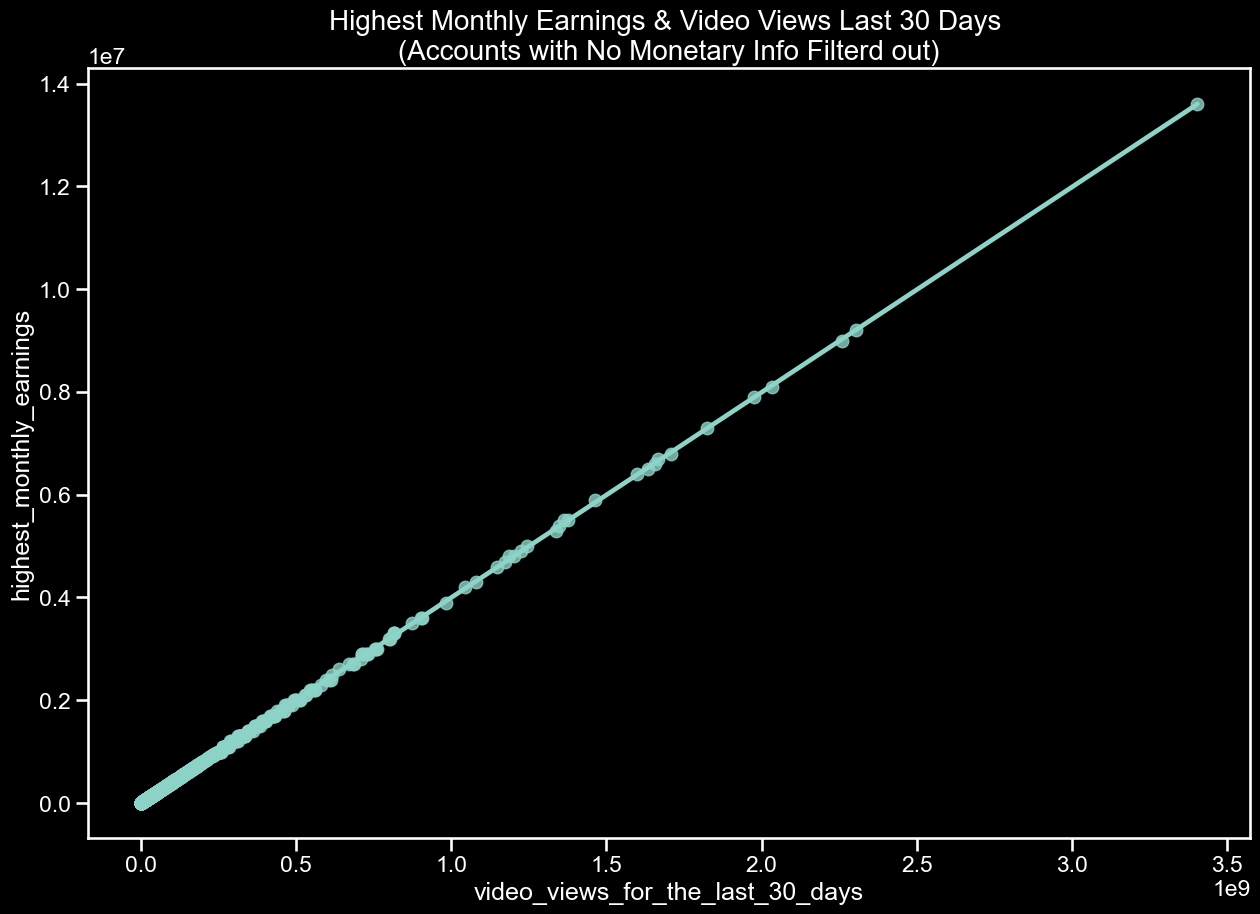

In [126]:
sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")

sns.regplot(
    data=yt_df[yt_df['highest_monthly_earnings']!=0],
    y='highest_monthly_earnings',
    x='video_views_for_the_last_30_days'
)

plt.title('Highest Monthly Earnings & Video Views Last 30 Days \n(Accounts with No Monetary Info Filterd out)', fontsize=20);

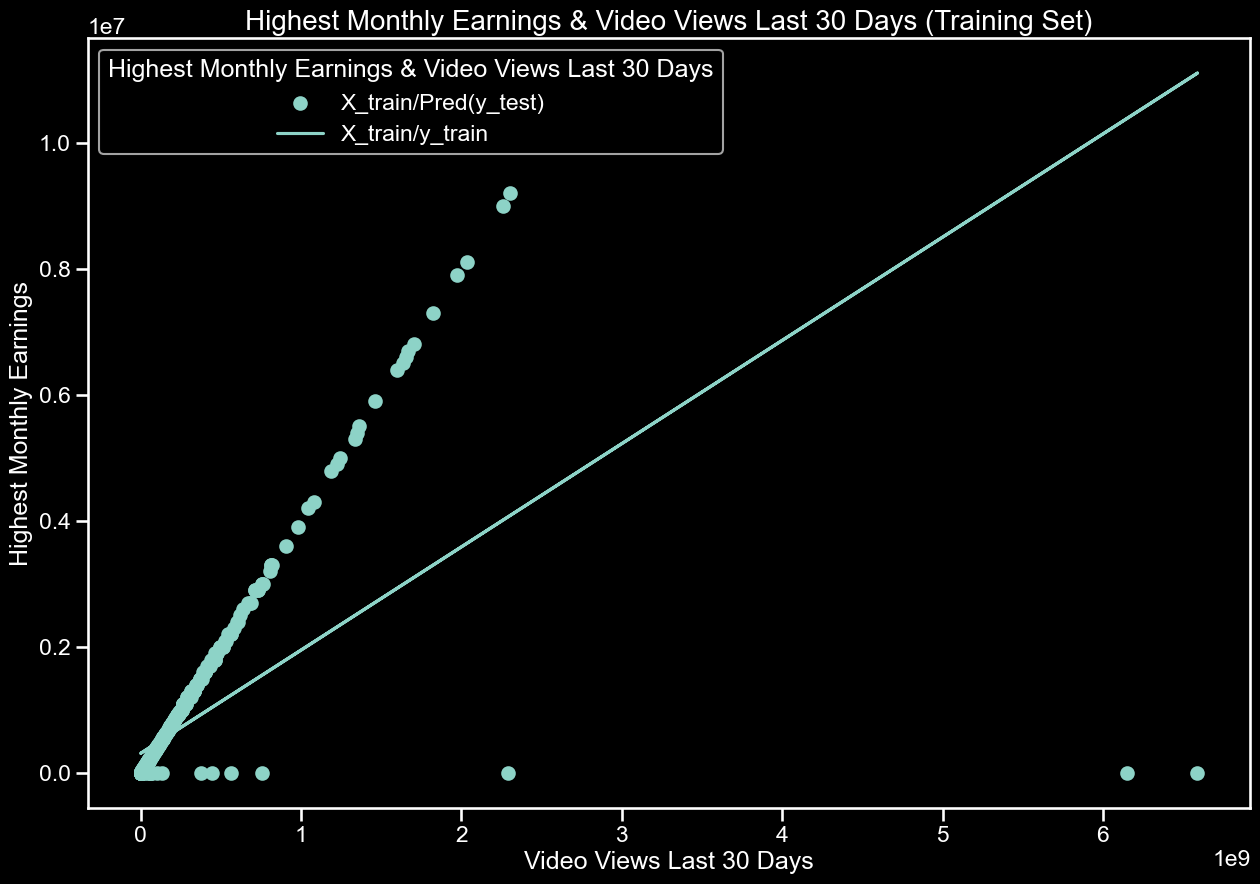

In [69]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


# Prediction on training set
plt.scatter(X_train, y_train, 
            # color = 'lightcoral'
            )
plt.plot(X_train, y_pred_train, 
        #  color = 'firebrick'
         )
plt.title('Highest Monthly Earnings & Video Views Last 30 Days (Training Set)', fontsize=20)
plt.xlabel('Video Views Last 30 Days')
plt.ylabel('Highest Monthly Earnings')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Highest Monthly Earnings & Video Views Last 30 Days', loc='best', )
# plt.box(False)

plt.show()

seems like the highest & lowest monthly earnings of each creator is perfectly linearly correlated

<Axes: xlabel='highest_monthly_earnings', ylabel='lowest_monthly_earnings'>

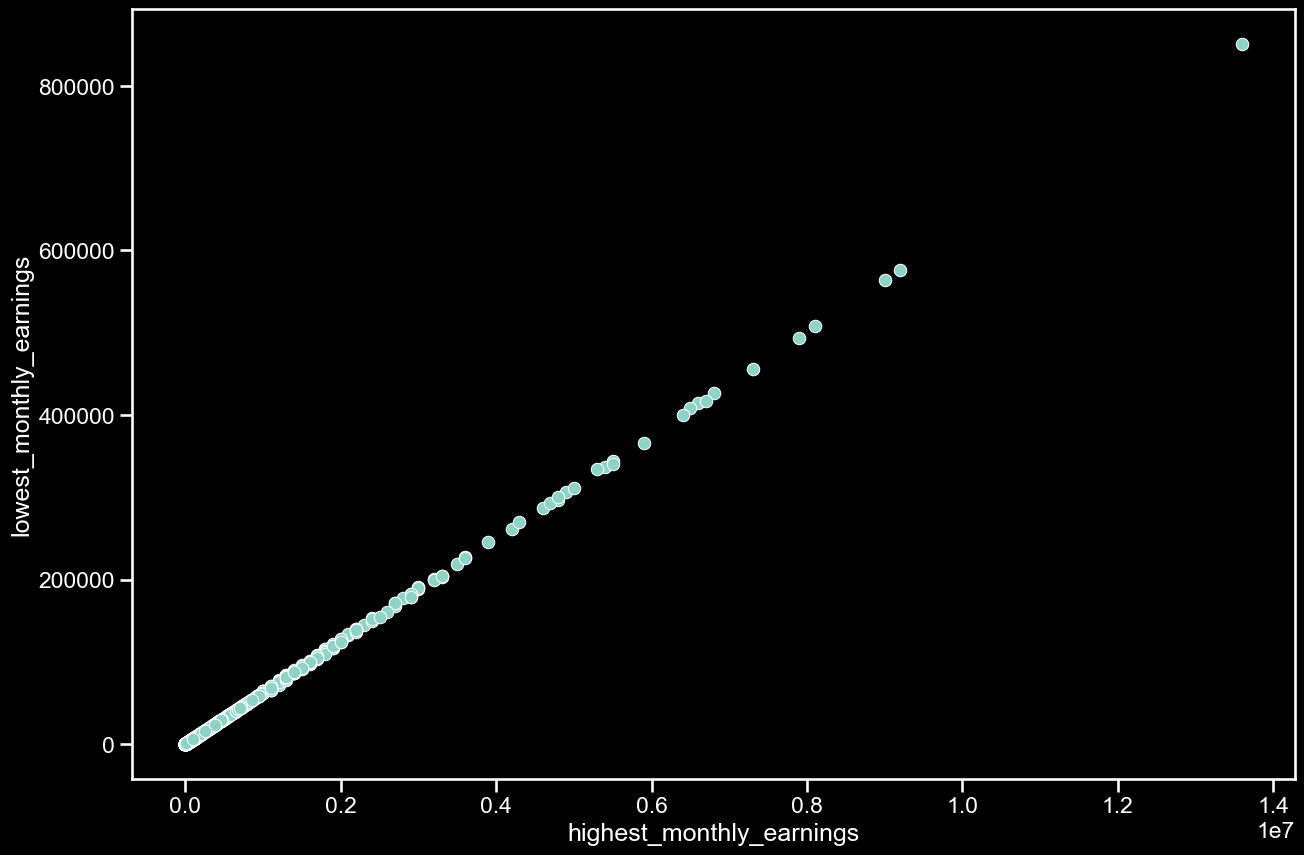

In [30]:
tmp = yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']]

# plot
sns.set(
    style='ticks', context='talk', rc={'figure.figsize':(15,10)}
)
plt.style.use('dark_background')

fig, ax = plt.subplots()
sns.scatterplot(
    x=tmp['highest_monthly_earnings'],
    y=tmp['lowest_monthly_earnings'],
)

build  a simple linear regression  model for `highest_monthly_earnings` and `lowest_monthly_earnings`

In [45]:
yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']].corr()

,lowest_monthly_earnings,highest_monthly_earnings
lowest_monthly_earnings,1.000000,0.999955
highest_monthly_earnings,0.999955,1.000000


In [43]:

tmp = yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']]

# Splitting variables
X = tmp.iloc[:, :1]  # independent - lowest
y = tmp.iloc[:, 1:]  # dependent - highest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# print(regressor.coef_,)


[[15.98817753]]


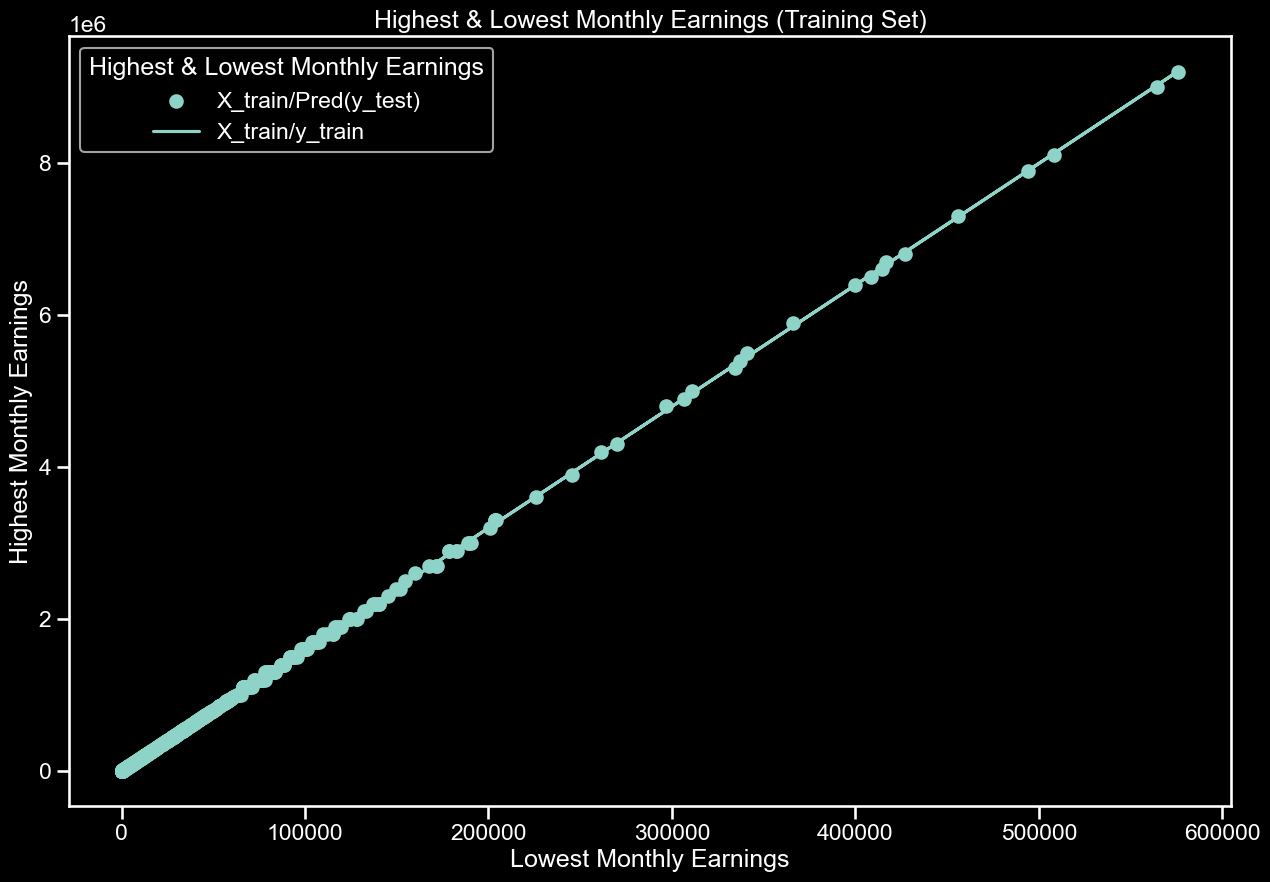

In [46]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train


# Prediction on training set
plt.scatter(X_train, y_train, 
            # color = 'lightcoral'
            )
plt.plot(X_train, y_pred_train, 
        #  color = 'firebrick'
         )
plt.title('Highest & Lowest Monthly Earnings (Training Set)')
plt.xlabel('Lowest Monthly Earnings')
plt.ylabel('Highest Monthly Earnings')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Highest & Lowest Monthly Earnings', loc='best', )
# plt.box(False)
plt.show()

In [171]:
yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']].describe()

,lowest_monthly_earnings,highest_monthly_earnings
count,995.000000,9.950000e+02
mean,36886.148281,5.898078e+05
std,71858.724092,1.148622e+06
min,0.000000,0.000000e+00
25%,2700.000000,4.350000e+04
50%,13300.000000,2.127000e+05
75%,37900.000000,6.068000e+05
max,850900.000000,1.360000e+07


In [201]:
yt_df['lowest_monthly_earnings'].median()

13300.0

Text(0.5, 1.0, 'Lowest Monthly Earnings Distribution')

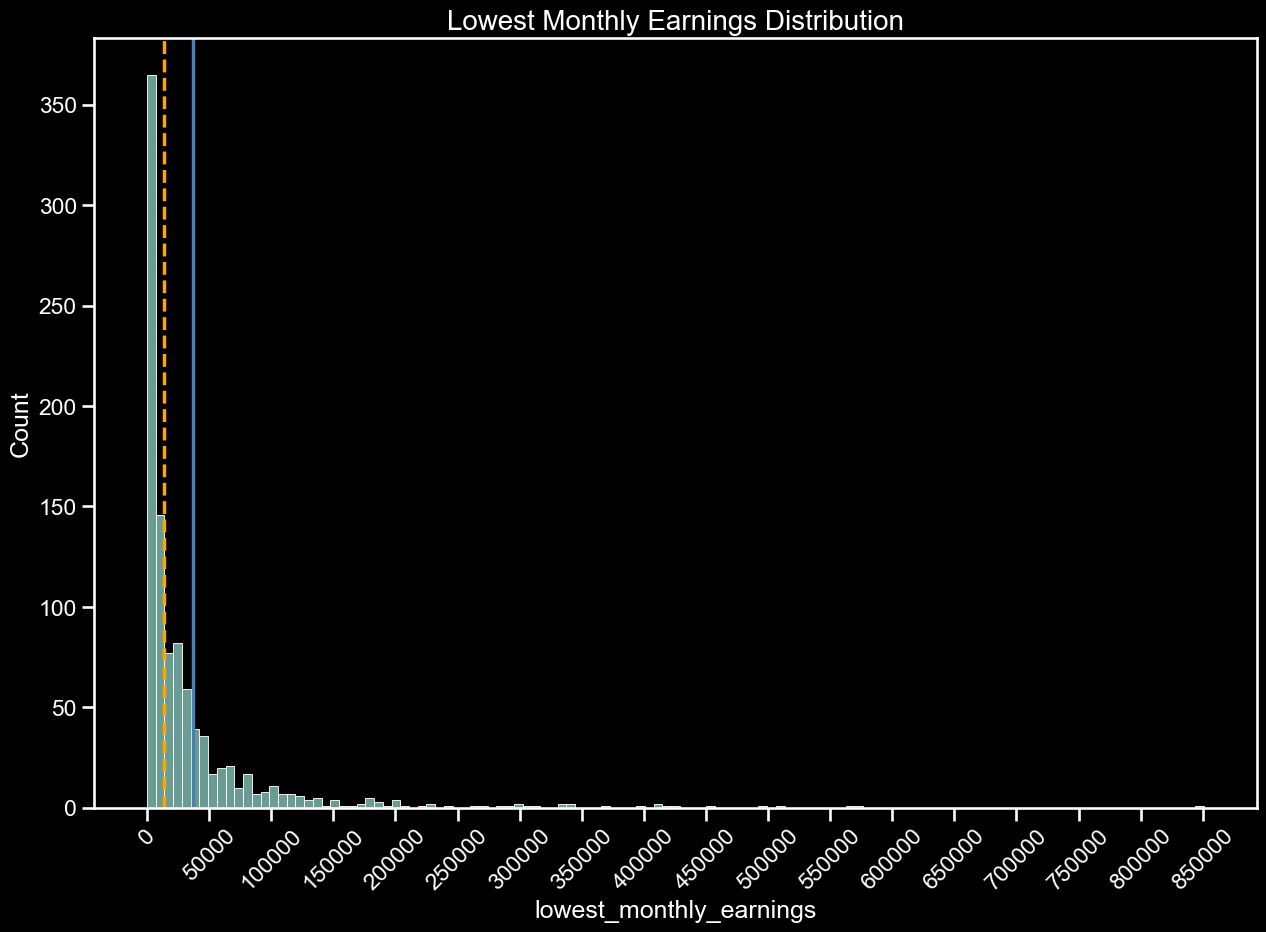

In [200]:

g = sns.histplot(
    yt_df, 
    x="lowest_monthly_earnings", 
    # hue="type",
    # palette='Set1'
    # element="step"
)
g.axes.axvline(x=yt_df['lowest_monthly_earnings'].mean(), c='steelblue', ls='-', lw=2.5)
g.axes.axvline(x=yt_df['lowest_monthly_earnings'].median(), c='orange', ls='--', lw=2.5)
g.axes.xaxis.set_ticks(np.arange(0, yt_df['lowest_monthly_earnings'].max(), 50000))
g.axes.tick_params(axis='x', rotation=45);
g.axes.set_title('Lowest Monthly Earnings Distribution', fontsize=20)

In [204]:
yt_df['highest_monthly_earnings'].median()
212,700.0

212700.0

Text(0.5, 1.0, 'Highest Monthly Earnings Distribution')

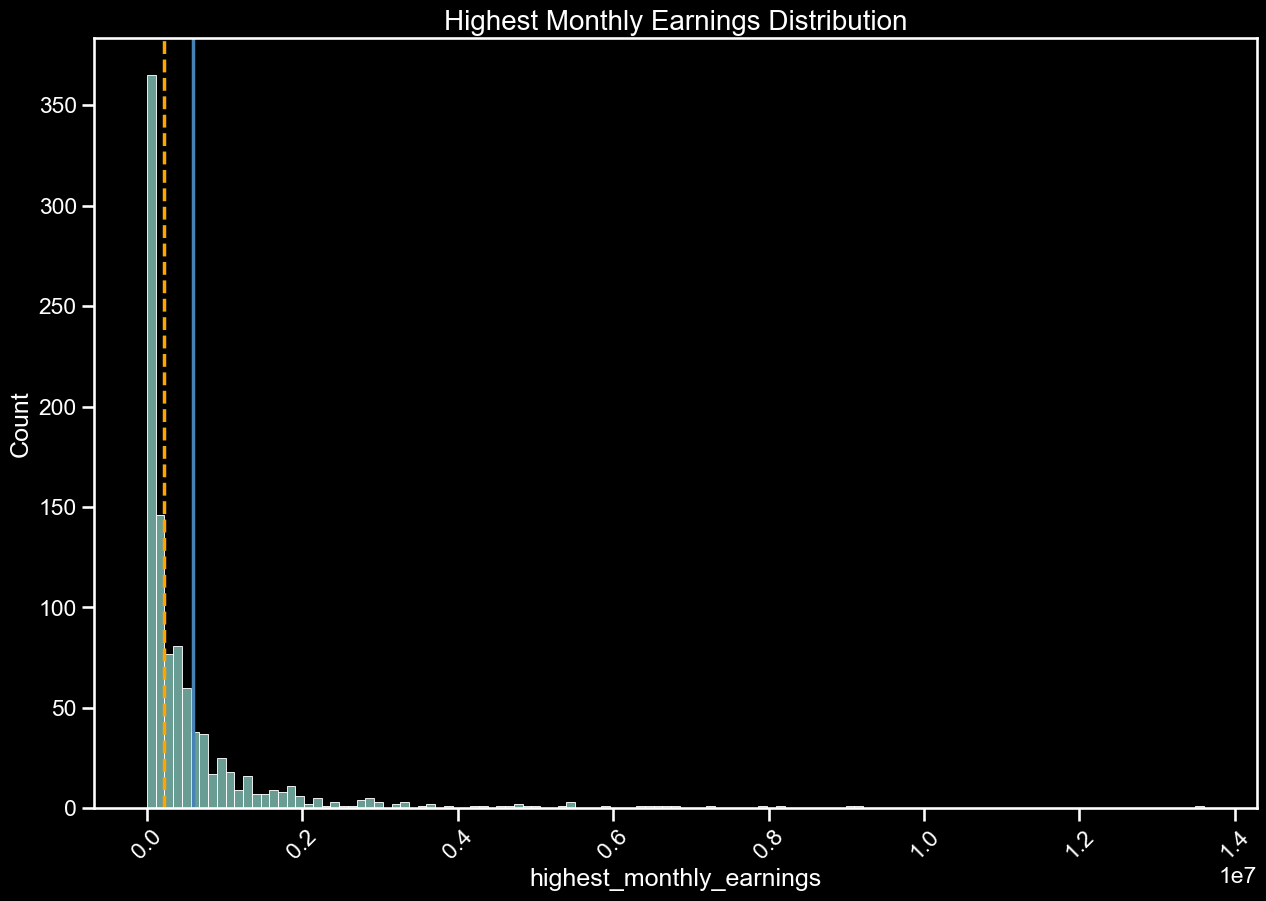

In [203]:

g = sns.histplot(
    yt_df, 
    x="highest_monthly_earnings", 
    # hue="type",
    # palette='Set1'
    # element="step"
)
g.axes.axvline(x=yt_df['highest_monthly_earnings'].mean(), c='steelblue', ls='-', lw=2.5)
g.axes.axvline(x=yt_df['highest_monthly_earnings'].median(), c='orange', ls='--', lw=2.5)
# g.axes.xaxis.set_ticks(np.arange(0, yt_df['highest_monthly_earnings'].max(), 50000))
g.axes.tick_params(axis='x', rotation=45);
g.axes.set_title('Highest Monthly Earnings Distribution', fontsize=20)

589,800

Text(0.5, 1.0, 'YouTube Highest & Lowest Monthly Earnings Distributions')

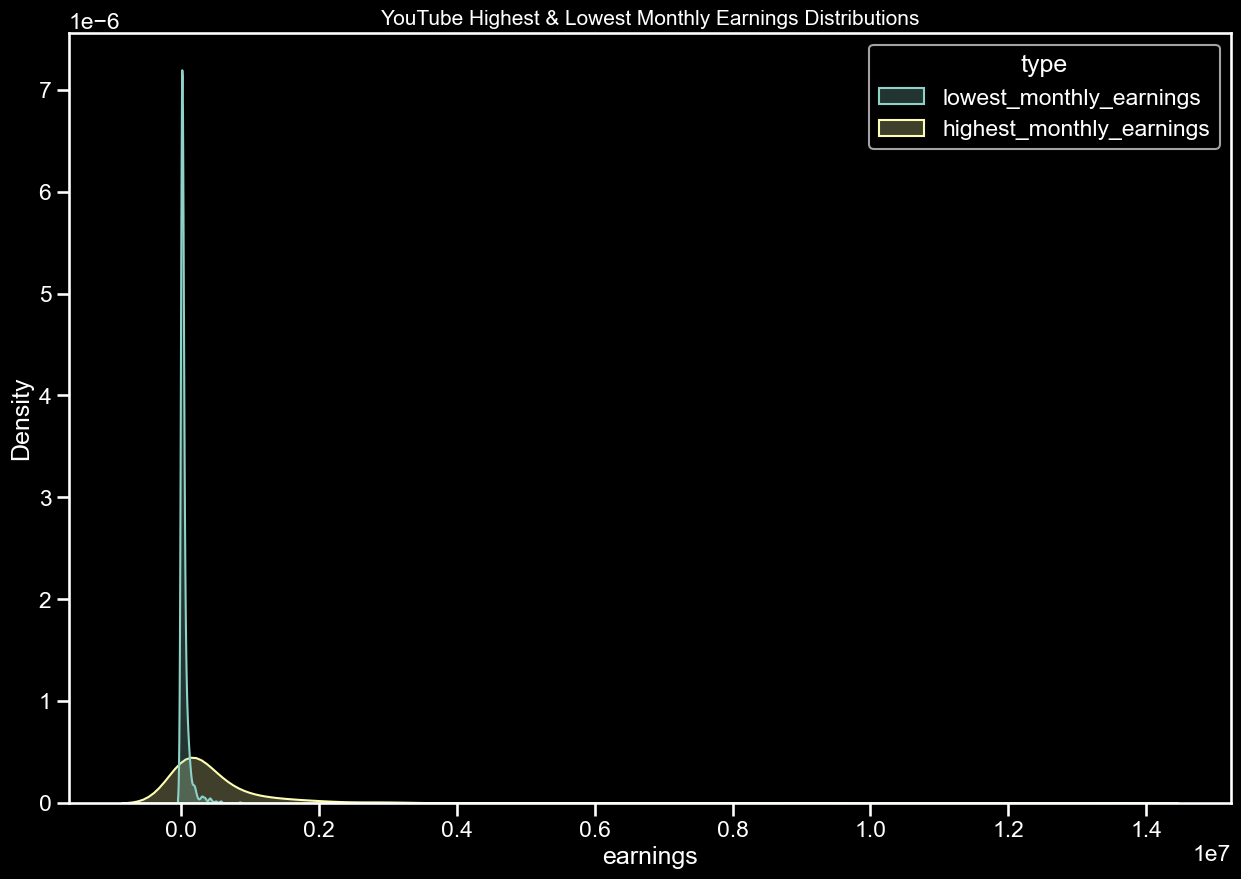

In [48]:
tmp = yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']]
tmp = tmp.stack().reset_index()
# tmp.columns

tmp.rename(columns={'level_1':'type', 0:'earnings'}, inplace=True)
tmp = tmp[['type', 'earnings']]

sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")

# plot
fig, ax = plt.subplots()
sns.kdeplot(
    data=tmp,
    x='earnings',
    hue='type',
    fill=True
)
ax.set_title('YouTube Highest & Lowest Monthly Earnings Distributions', fontsize=15)

logarithimmized

Text(0.5, 1.0, 'Logarithmized YouTube Highest & Lowest Monthly Earnings Distributions')

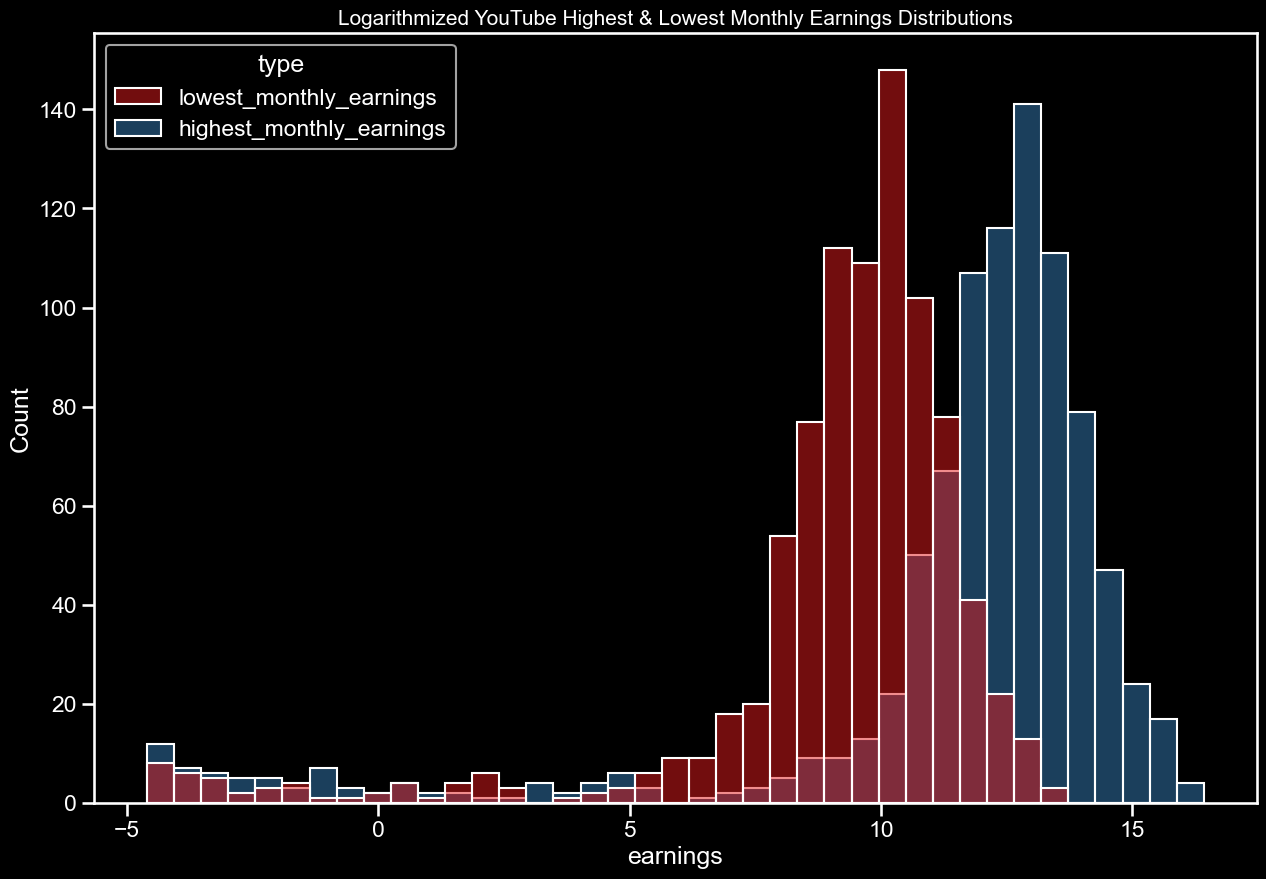

In [170]:
tmp = yt_df.copy()[['lowest_monthly_earnings', 'highest_monthly_earnings']]
tmp = tmp.stack().reset_index()
# tmp.columns

tmp.rename(columns={'level_1':'type', 0:'earnings'}, inplace=True)
tmp = tmp[['type', 'earnings']]

# log 
tmp['earnings']= np.log(tmp['earnings'])

# plot

sns.set(style="ticks", context="talk", rc={'figure.figsize':(15,10)})
plt.style.use("dark_background")

fig, ax = plt.subplots() 
sns.histplot(
    tmp, 
    x="earnings", 
    hue="type",
    palette='Set1'
    # element="step"
)


ax.set_title('Logarithmized YouTube Highest & Lowest Monthly Earnings Distributions', fontsize=15)

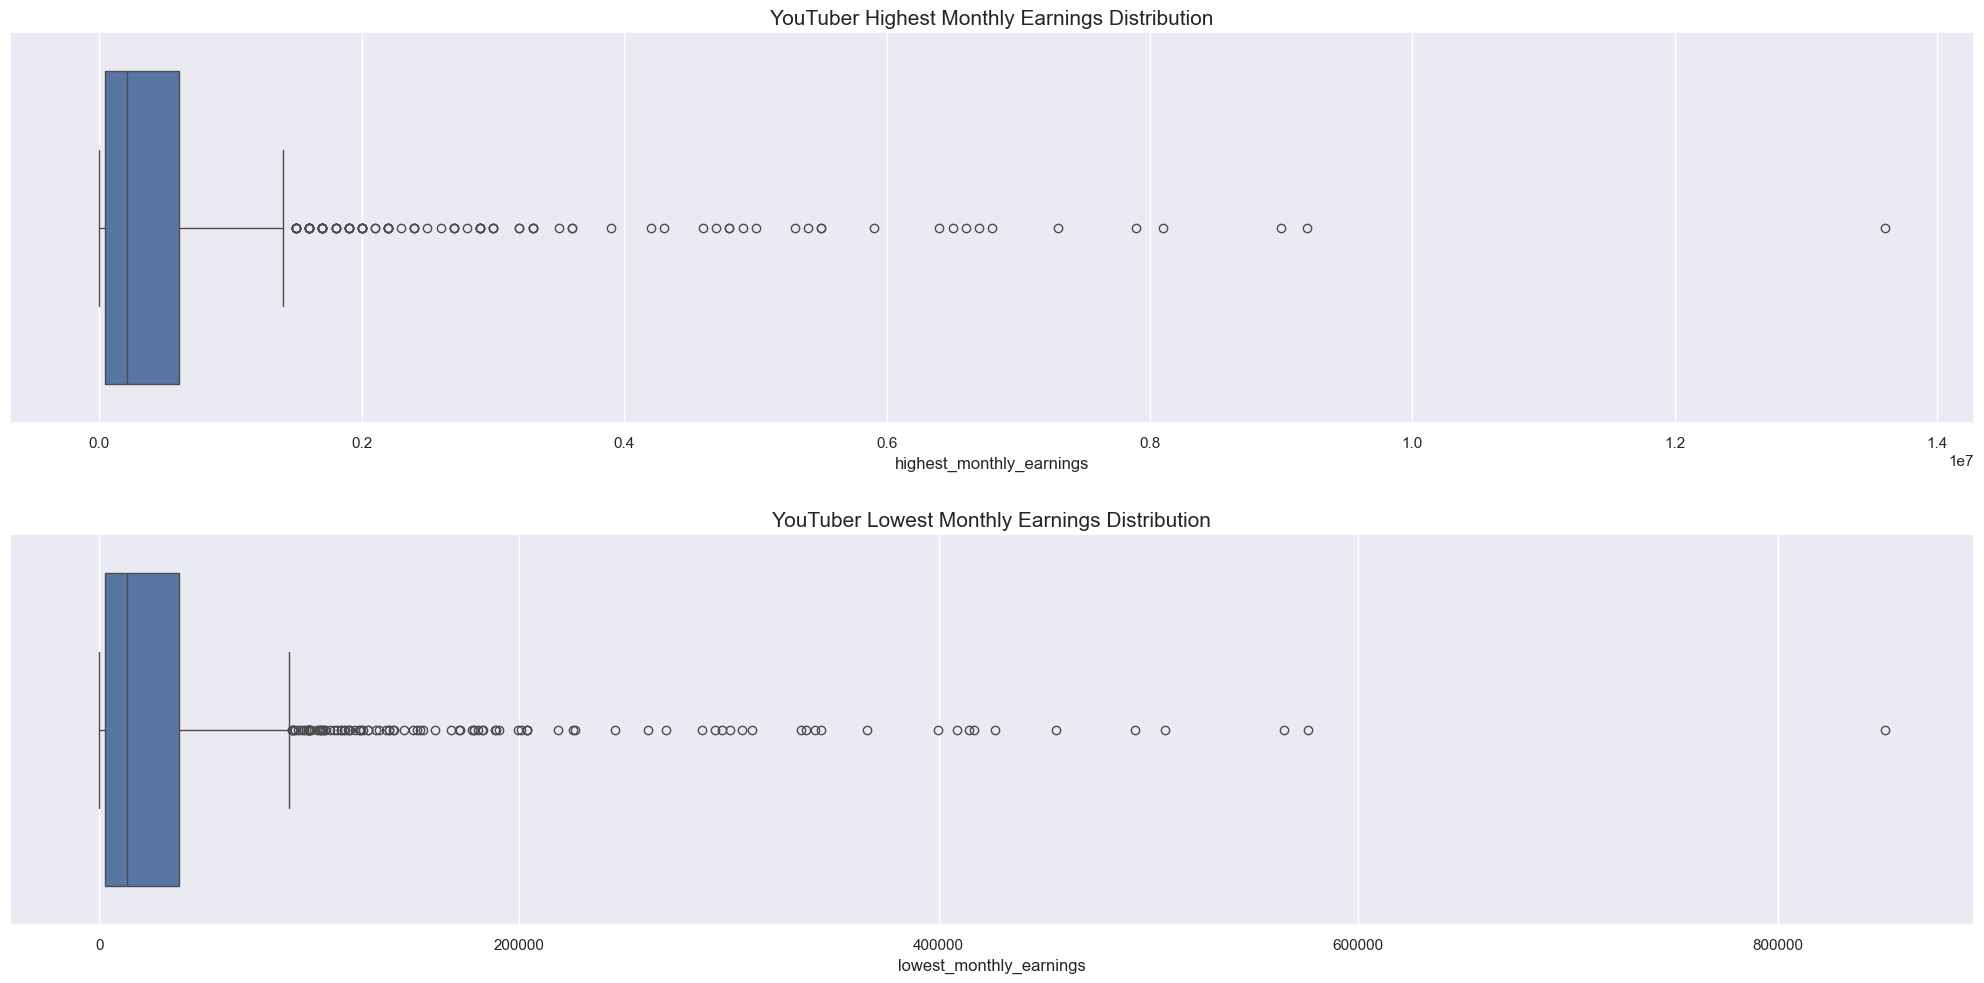

In [158]:
fig, ax = plt.subplots(2,1, figsize=(20,10))

sns.boxplot(
    ax=ax[0], 
    x='highest_monthly_earnings',
    data=yt_df,
)
ax[0].set_title('YouTuber Highest Monthly Earnings Distribution', fontsize=15)

sns.boxplot(
    ax=ax[1], 
    x='lowest_monthly_earnings',
    data=yt_df,
)
ax[1].set_title('\nYouTuber Lowest Monthly Earnings Distribution', fontsize=15)

fig.tight_layout();